In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import os
import logging
import matplotlib.pyplot as plt

c:\Users\mt01034\Anaconda3\envs\tf-env\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\mt01034\Anaconda3\envs\tf-env\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
c:\Users\mt01034\Anaconda3\envs\tf-env\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
import os
import logging
import matplotlib.pyplot as plt

c:\Users\mt01034\Anaconda3\envs\tf-env\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\mt01034\Anaconda3\envs\tf-env\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
c:\Users\mt01034\Anaconda3\envs\tf-env\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
# set the seeds so that we get the same initialization across different trials
seed_random = 1989

In [3]:

log_time = datetime.now().strftime("%d-%m-%Y_%H%M%S")


logging.basicConfig(filename='train_predictive_models_Masking.log',
                        format='%(asctime)s - %(message)s',
                        level=logging.INFO)
logging.info("Starting the experiemnt...")

antibitics_abx_list = ['NIT', 'SXT', 'CIP', 'LVX']
features_path ='all_uti_features.csv'
label_path='all_uti_resist_labels.csv'


In [4]:
# Load in data 
feature_df = pd.read_csv(features_path)
label_df = pd.read_csv(label_path)

In [5]:
feature_df.drop('example_id', inplace=True, axis=1)
feature_df

,demographics - age,demographics - is_white,demographics - is_veteran,micro - prev resistance LVX 14,micro - prev resistance AMP 14,micro - prev resistance CFZ 14,micro - prev resistance NIT 14,micro - prev resistance GEN 14,micro - prev resistance SXT 14,micro - prev resistance TET 14,...,selected micro - colonization pressure NIT 90 - overall,selected micro - colonization pressure OXA 90 - overall,selected micro - colonization pressure PEN 90 - overall,selected micro - colonization pressure SAM 90 - overall,selected micro - colonization pressure SXT 90 - overall,selected micro - colonization pressure TET 90 - overall,selected micro - colonization pressure TZP 90 - overall,selected micro - colonization pressure VAN 90 - overall,is_train,uncomplicated
0,54,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.24,0.56,0.49,0.38,0.26,0.37,0.06,0.13,0,0
1,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.19,0.78,0.83,0.33,0.20,0.35,0.18,0.13,1,0
2,89,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.21,0.66,0.51,0.50,0.25,0.37,0.05,0.12,1,0
3,49,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.23,0.47,0.50,0.25,0.26,0.35,0.06,0.12,1,0
4,21,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.24,0.50,0.49,0.33,0.25,0.37,0.05,0.10,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116897,66,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.24,0.49,0.54,0.33,0.25,0.35,0.09,0.10,1,0
116898,74,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.21,0.49,0.50,0.30,0.25,0.34,0.06,0.09,1,0
116899,48,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.21,0.51,0.51,0.28,0.23,0.34,0.05,0.10,1,1
116900,63,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.18,0.52,0.57,0.38,0.27,0.35,0.06,0.12,0,0


In [6]:
label_df.drop('example_id', inplace=True, axis=1)
label_df

,NIT,SXT,CIP,LVX,is_train,uncomplicated
0,0.0,0.0,0.0,0.0,0,0
1,0.0,0.0,0.0,0.0,1,0
2,0.0,0.0,1.0,1.0,1,0
3,0.0,0.0,0.0,0.0,1,0
4,0.0,0.0,0.0,0.0,1,1
...,...,...,...,...,...,...
116897,1.0,1.0,1.0,1.0,1,0
116898,NaN,NaN,0.0,0.0,1,0
116899,0.0,0.0,0.0,0.0,1,1
116900,0.0,0.0,0.0,0.0,0,0


In [7]:
import random
os.environ['PYTHONHASHSEED'] = str(seed_random)
random.seed(seed_random)

In [8]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
kfold = KFold(n_splits=3, shuffle=True, random_state=1989)

In [ ]:
from tensorflow.keras.layers import *

In [168]:
from numpy import dstack
from tensorflow.keras.utils import to_categorical

import tensorflow as tf
tf.random.set_seed(seed_random)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv1D, Flatten, Dropout, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping

def build_conv1D_model(train_data_reshaped):
    n_timesteps = train_data_reshaped.shape[1] #13
    n_features  = train_data_reshaped.shape[2] #1 
    model = Sequential(name="model_conv1D")
    model.add(Input(shape=(n_timesteps,n_features)))
    #model.add(BatchNormalization(axis=1)
    model.add(Conv1D(filters=16, kernel_size=7, activation='relu', name="Conv1D_1"))
    model.add(Dropout(0.3))
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', name="Conv1D_2"))
    model.add(Dropout(0.3))
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', name="Conv1D_3"))
    model.add(Dropout(0.3))
    model.add(MaxPooling1D(pool_size=2, name="MaxPooling1D"))
    model.add(Flatten())
    model.add(Dense(32, activation='relu', name="Dense_1"))
    model.add(Dense(4, activation='sigmoid', name="Dense_2"))

    return model


In [71]:
tf.config.run_functions_eagerly(True)
#tf.enable_eager_execution()
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Flatten, Conv1D

from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras import backend as K
import uuid

def add_pos_2(input,nb):
    input_pos_encoding = tf.constant(nb, shape=[input.shape[1]], dtype="int32")/input.shape[1]
    input_pos_encoding = tf.cast(tf.reshape(input_pos_encoding, [1,10]),tf.float32)
    input = tf.add(input ,input_pos_encoding)
    return input

def transformer_encoder(inputs,key_dim,num_heads):
    dropout=0.2
    # Normalization and Attention
    print("transformer_encoder",inputs.shape)
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=key_dim, num_heads=num_heads
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Dense(key_dim, activation='softmax')(x)
    return x + res

def stack_block_transformer_spatial(num_transformer_blocks,featurelength,x):
  for _ in range(num_transformer_blocks):
      x = transformer_encoder(x,featurelength,2)
  x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)

  return x


In [124]:
def Tran_Model(train_data_reshaped):
    num_transformer_blocks=1
    n_features = train_data_reshaped.shape[1] #13
    feature_length  = train_data_reshaped.shape[2] #1 
    input=Input(shape=(n_features,feature_length))
    x=input
    x = stack_block_transformer_spatial(num_transformer_blocks,n_features*feature_length, x)
    
    x = Dropout(0.3)(x)
    x = layers.Dense(32, activation='relu')(x)
    x = Dropout(0.3)(x)
    #x = layers.Dense(20, activation='selu')(x)
    #x = Dropout(0.1)(x)
    output = layers.Dense(4, activation='sigmoid')(x)
  
    model = Model(input, output)
    #opt = optimizers.RMSprop(lr=0.001)
    #model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'],experimental_run_tf_function=False)
    #print(model.summary())
    return model

In [132]:
from tensorflow.keras.layers import *

Extract Train and Test set baselabel

In [169]:
train_feature_df=(feature_df.loc[feature_df['is_train'] == 1])
test_feature_df=(feature_df.loc[feature_df['is_train'] == 0]).loc[feature_df['uncomplicated'] == 1]
train_label_df=(label_df.loc[label_df['is_train'] == 1])
test_label_df=(label_df.loc[label_df['is_train'] == 0]).loc[feature_df['uncomplicated'] == 1]

In [13]:
train_feature_df.drop(['uncomplicated','is_train'], inplace=True, axis=1)
test_feature_df.drop(['uncomplicated','is_train'], inplace=True, axis=1)

In [170]:
train_feature_df.shape

(80962, 790)

Imputing Missing values with 0

In [171]:
train_feature_df=train_feature_df.fillna(0)
train_label_df[antibitics_abx_list]=train_label_df[antibitics_abx_list].fillna(-1)
test_feature_df=test_feature_df.fillna(0)
test_label_df[antibitics_abx_list]=test_label_df[antibitics_abx_list].fillna(-1)

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


array([[<AxesSubplot:title={'center':'NIT'}>,
        <AxesSubplot:title={'center':'SXT'}>],
       [<AxesSubplot:title={'center':'CIP'}>,
        <AxesSubplot:title={'center':'LVX'}>]], dtype=object)

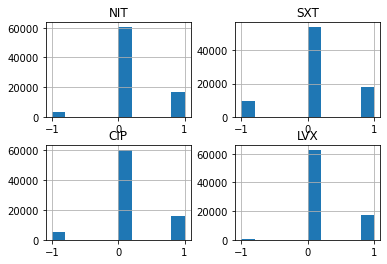

In [172]:
import matplotlib.pyplot as plt
train_label_df[antibitics_abx_list].hist()

In [17]:
sample_size = train_feature_df.values.shape[0] # number of samples in train set
time_steps  = train_feature_df.values.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number
train_data_reshaped = train_feature_df.values.reshape(sample_size,time_steps,input_dimension)
   
tramode=Tran_Model(train_data_reshaped)
tramode.summary()

transformer_encoder (None, 788, 1)
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 788, 1)]     0                                            
__________________________________________________________________________________________________
layer_normalization (LayerNorma (None, 788, 1)       2           input_1[0][0]                    
__________________________________________________________________________________________________
multi_head_attention (MultiHead (None, 788, 1)       11033       layer_normalization[0][0]        
                                                                 layer_normalization[0][0]        
__________________________________________________________________________________________________
dropout (Dropout)               (None, 788, 1)       0     

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [18]:
train_data_reshaped[:1].shape

(1, 788, 1)

In [19]:
attention_layer = tramode.layers[2]
attention_layer

In [20]:
import matplotlib.pyplot as plt
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
def plot_metric(history, labels, n,metrics):
  # Use a log scale to show the wide range of values.
  for metric in metrics:
        plt.semilogy(history.epoch, history.history[metric],
                color=colors[n], label='Train '+labels[n])
        plt.semilogy(history.epoch, history.history['val_'+metric],
                color=colors[n], label='Val '+labels[n],
                linestyle="--")
        n=n+1
  plt.xlabel('Epoch')
  plt.ylabel('Metrics')

  plt.legend()
  plt.savefig('output/'+'Plot_Default_'.join(labels)+'.png')

In [21]:
from tensorflow.keras import backend as K


In [22]:
mask_value=-1
#model_threshold=0.5

In [23]:
def masked_accuracy(y_true, y_pred, model_threshold=0.5):
    dtype = K.floatx()
    total = K.sum(K.cast(K.not_equal(y_true, mask_value), dtype))
    #total=K.cast(len(y_true),dtype)
    #correct = K.sum(K.cast(K.equal(y_true, K.round(y_pred)), dtype))
    correct = K.sum(K.cast(K.greater(K.clip(y_pred, 0, 1), model_threshold), dtype))
    #print(correct,total)
    return correct / total

In [24]:
def masked_loss_function(y_true, y_pred):
    mask = K.cast(K.not_equal(y_true, mask_value), K.floatx())
    #print(mask)
    return K.binary_crossentropy(y_true * mask, y_pred * mask)

In [25]:
def masked_f1(y_true, y_pred, model_threshold=0.5):
    mask = K.cast(K.not_equal(y_true, mask_value), K.floatx())
    dtype = K.floatx()
    def recall_m(y_true, y_pred):
        #TP = K.sum(K.round(K.clip(y_true * y_pred*mask, 0, 1)))
        #Positives = K.sum(K.round(K.clip(y_true*mask, 0, 1)))
        TP=K.sum(K.cast(K.greater(K.clip(y_true * y_pred *mask, 0, 1), model_threshold), dtype) )
        Positives=K.sum(K.cast(K.greater(K.clip(y_true *mask, 0, 1), model_threshold), dtype) )

        recall = TP / (Positives+K.epsilon())    
        return recall 


    def precision_m(y_true, y_pred):
        #TP = K.sum(K.round(K.clip(y_true * y_pred *mask, 0, 1)))
        #Pred_Positives = K.sum(K.round(K.clip(y_pred*mask, 0, 1)))
        TP=K.sum(K.cast(K.greater(K.clip(y_true * y_pred *mask, 0, 1), model_threshold), dtype ))
        Pred_Positives=K.sum(K.cast(K.greater(K.clip(y_pred *mask, 0, 1), model_threshold),dtype))
    
        precision = TP / (Pred_Positives+K.epsilon())
        return precision 

    precision, recall = precision_m(y_true, y_pred), recall_m(y_true, y_pred)

    return 2*((precision*recall)/(precision+recall+K.epsilon()))
  

In [107]:
def masked_f1_loss(y_true, y_pred):
    mask = K.cast(K.not_equal(y_true, mask_value), K.floatx())
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    tp = tf.reduce_sum(y_true*y_pred*mask, axis=0)
    tn = tf.reduce_sum((1-y_true)*(1-y_pred)*mask, axis=0)
    fp = tf.reduce_sum((1-y_true)*y_pred*mask, axis=0)
    fn = tf.reduce_sum(y_true*(1-y_pred)*mask, axis=0)

    soft_f1= 2 * tp / (2*tp+fn+fp+K.epsilon())

    return 1 - soft_f1

In [108]:
def masked_f1_double_loss(y_true, y_pred):
    mask = K.cast(K.not_equal(y_true, mask_value), K.floatx())
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    tp = tf.reduce_sum(y_true*y_pred*mask, axis=0)
    tn = tf.reduce_sum((1-y_true)*(1-y_pred)*mask, axis=0)
    fp = tf.reduce_sum((1-y_true)*y_pred*mask, axis=0)
    fn = tf.reduce_sum(y_true*(1-y_pred)*mask, axis=0)

    soft_f1_1= 2 * tp / (2*tp+fn+fp+K.epsilon())
    soft_f1_0= 2 * tn / (2*tn+fn+fp+K.epsilon())

    return 1 - 0.5*(soft_f1_1+soft_f1_0)

In [26]:
def masked_precision(y_true, y_pred, model_threshold=0.5):
    dtype = K.floatx()
    mask = K.cast(K.not_equal(y_true, mask_value), K.floatx())
    #TP = K.sum(K.round(K.clip(y_true * y_pred *mask, 0, 1)))
    TP=K.sum(K.cast(K.greater(K.clip(y_true * y_pred *mask, 0, 1), model_threshold), dtype ))
    #Pred_Positives = K.sum(K.round(K.clip(y_pred*mask, 0, 1)))
    Pred_Positives=K.sum(K.cast(K.greater(K.clip(y_pred *mask, 0, 1), model_threshold),dtype))
    precision = TP / (Pred_Positives+K.epsilon())
    return precision 

In [27]:
def masked_recall(y_true, y_pred, model_threshold=0.5):
    dtype = K.floatx()
    mask = K.cast(K.not_equal(y_true, mask_value), K.floatx())
    #TP = K.sum(K.round(K.clip(y_true * y_pred*mask, 0, 1)))
    TP=K.sum(K.cast(K.greater(K.clip(y_true * y_pred *mask, 0, 1), model_threshold), dtype) )
    #Positives = K.sum(K.round(K.clip(y_true*mask, 0, 1)))
    Positives=K.sum(K.cast(K.greater(K.clip(y_true *mask, 0, 1), model_threshold), dtype) )
    
    recall = TP / (Positives+K.epsilon())    
    return recall 

In [28]:
def masked_specificity(y_true, y_pred, model_threshold=0.5):
    dtype = K.floatx()
    mask = K.cast(K.not_equal(y_true, mask_value), K.floatx())
    #TP = K.sum(K.round(K.clip(y_true * y_pred*mask, 0, 1)))
    FP=K.sum(K.cast(K.greater(K.clip((1-y_true) * y_pred *mask, 0, 1), model_threshold),dtype) )
    #Positives = K.sum(K.round(K.clip(y_true*mask, 0, 1)))
    TN=K.sum(K.cast(K.greater(K.clip((1-y_true)*(1-y_pred) *mask, 0, 1), model_threshold),dtype) )
    
    recall = TN / (TN+FP+K.epsilon())    
    return recall 

In [29]:
def masked_AUC(y_true, y_pred):
    mask = K.cast(K.not_equal(y_true, mask_value), K.floatx())
    m = tf.keras.metrics.AUC()
    m.update_state(y_true*mask, y_pred*mask)
    return m.result().numpy()

In [74]:
def masked_SenSpeci_loss(y_true, y_pred):
    mask = K.cast(K.not_equal(y_true, mask_value), K.floatx())
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    tp = tf.reduce_sum(y_true*y_pred*mask, axis=0)
    tn = tf.reduce_sum((1-y_true)*(1-y_pred)*mask, axis=0)
    fp = tf.reduce_sum((1-y_true)*y_pred*mask, axis=0)
    fn = tf.reduce_sum(y_true*(1-y_pred)*mask, axis=0)

    soft_sensitivity= tp / (tp+fn+K.epsilon())
    soft_specificity= tn / (tn+fp+K.epsilon())

    return 1 - (soft_sensitivity*soft_specificity)

In [92]:
def masked_TPTN_loss(y_true, y_pred):
    mask = K.cast(K.not_equal(y_true, mask_value), K.floatx())
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    tp = tf.reduce_sum(y_true*y_pred*mask, axis=0)
    tn = tf.reduce_sum((1-y_true)*(1-y_pred)*mask, axis=0)
    fp = tf.reduce_sum((1-y_true)*y_pred*mask, axis=0)
    fn = tf.reduce_sum(y_true*(1-y_pred)*mask, axis=0)


    return 1 - ((tp*tn)/(tp+tn+fp+fn+K.epsilon()))

In [99]:
def masked_TPPlusTN_loss(y_true, y_pred):
    mask = K.cast(K.not_equal(y_true, mask_value), K.floatx())
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    tp = tf.reduce_sum(y_true*y_pred*mask, axis=0)
    tn = tf.reduce_sum((1-y_true)*(1-y_pred)*mask, axis=0)
    fp = tf.reduce_sum((1-y_true)*y_pred*mask, axis=0)
    fn = tf.reduce_sum(y_true*(1-y_pred)*mask, axis=0)


    return 1 - ((tp+tn)/(tp+tn+fp+fn+K.epsilon()))

In [30]:
#thresholds = [0.2,0.3,0.4,0.5,0.6, 0.7,0.8]

METRICS = [
      masked_accuracy,
      masked_precision,
      masked_recall,
      masked_specificity,
      masked_f1,
      masked_AUC
      #[tf.keras.metrics.BinaryAccuracy(name=f'BiAccuracy+{thr}',threshold=thr) for thr in thresholds],
      #[tf.keras.metrics.Precision(name=f'precision+{thr}',thresholds=thr) for thr in thresholds],
      #[tf.keras.metrics.Recall(name=f'recall_+{thr}',thresholds=thr) for thr in thresholds],
      #tf.keras.metrics.AUC(name='auc'),
      #f1
]

In [58]:
EPOCHS = 100
BATCH_SIZE = 32

es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    verbose=1,
    patience=10,
    mode='min',
    restore_best_weights=True)

In [34]:

from sklearn.metrics import roc_curve
from numpy import sqrt
from numpy import argmax
from matplotlib import pyplot
'''
#ypredict = model_checkthreshold.predict(x_val_reshaped)
mask = K.cast(K.not_equal(y_val_tfidf, mask_value), K.floatx())
Threshold_list=[]
for i in range(4):
    fpr, tpr, thres = roc_curve((y_val_tfidf.values*mask_np)[:, i], (ypredict*mask_np)[:, i])#test
    print(fpr.shape, tpr.shape, thres.shape)
    pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
    pyplot.plot(fpr, tpr, marker='.', label='1D-CNN')
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    pyplot.legend()
    # show the plot
    pyplot.show()
    gmeans = sqrt(tpr * (1-fpr))
    ix = argmax(gmeans)
    print('Best Threshold=%f, G-Mean=%.3f' % (thres[ix], gmeans[ix]))
    Threshold_list.append(thres[ix])
    

#fpr, tpr, thresholds = roc_curve((y_val_tfidf*mask_np).values, ypredict*mask_np)
'''

"\n#ypredict = model_checkthreshold.predict(x_val_reshaped)\nmask = K.cast(K.not_equal(y_val_tfidf, mask_value), K.floatx())\nThreshold_list=[]\nfor i in range(4):\n    fpr, tpr, thres = roc_curve((y_val_tfidf.values*mask_np)[:, i], (ypredict*mask_np)[:, i])#test\n    print(fpr.shape, tpr.shape, thres.shape)\n    pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')\n    pyplot.plot(fpr, tpr, marker='.', label='1D-CNN')\n    # axis labels\n    pyplot.xlabel('False Positive Rate')\n    pyplot.ylabel('True Positive Rate')\n    pyplot.legend()\n    # show the plot\n    pyplot.show()\n    gmeans = sqrt(tpr * (1-fpr))\n    ix = argmax(gmeans)\n    print('Best Threshold=%f, G-Mean=%.3f' % (thres[ix], gmeans[ix]))\n    Threshold_list.append(thres[ix])\n    \n\n#fpr, tpr, thresholds = roc_curve((y_val_tfidf*mask_np).values, ypredict*mask_np)\n"

In [35]:
#Update Threshold
#model_threshold=0.24 #np.mean(Threshold_list)
#model_threshold

In [36]:
best_result=0.0

In [59]:
accuracyresultlist=[]
precisionresultlist=[]
recallresultlist=[]
specificity=[]
auclist=[]
flist=[]

accuracyresultlist_CT=[]
precisionresultlist_CT=[]
recallresultlist_CT=[]
specificity_CT=[]
flist_CT=[]

accuracyresultlist_T=[]
precisionresultlist_T=[]
recallresultlist_T=[]
specificity_T=[]
flist_T=[]

for train_index, validate_index in kfold.split(train_feature_df, train_label_df[antibitics_abx_list]):
    X=train_feature_df
    Y=train_label_df[antibitics_abx_list]
    x_train_tfidf = X.iloc[train_index]
    y_train_tfidf = Y.iloc[train_index]
    x_val_tfidf = X.iloc[validate_index]
    y_val_tfidf = Y.iloc[validate_index]
    x_train_tfidf=x_train_tfidf.reset_index(drop=True)
    y_train_tfidf=y_train_tfidf.reset_index(drop=True)
    x_val_tfidf=x_val_tfidf.reset_index(drop=True)
    y_val_tfidf=y_val_tfidf.reset_index(drop=True)
    sample_size = x_train_tfidf.values.shape[0] # number of samples in train set
    time_steps  = x_train_tfidf.values.shape[1] # number of features in train set
    input_dimension = 1               # each feature is represented by 1 number
    train_data_reshaped = x_train_tfidf.values.reshape(sample_size,time_steps,input_dimension)
    #x_test_tfidf = (x_test_tfidf.values)
    #y_test_tfidf=(y_test_tfidf.values)
    sample_size = x_val_tfidf.values.shape[0] # number of samples in train set
    time_steps  = x_val_tfidf.values.shape[1] # number of features in train set

    x_val_reshaped = x_val_tfidf.values.reshape(sample_size,time_steps,input_dimension)

    x_test_tfidf=test_feature_df.reset_index(drop=True)
    y_test_tfidf =test_label_df[antibitics_abx_list].reset_index(drop=True)
    sample_size = x_test_tfidf.values.shape[0] # number of samples in train set
    time_steps  = x_test_tfidf.values.shape[1] # number of features in train set
    test_data_reshaped =x_test_tfidf.values.reshape(sample_size,time_steps,input_dimension)

    #model = Tran_Model(train_data_reshaped)
    model=build_conv1D_model(train_data_reshaped)
    model.compile(loss=masked_loss_function,
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                metrics=METRICS)
    
    history = model.fit(train_data_reshaped, y_train_tfidf, epochs=EPOCHS,validation_data=(x_val_reshaped, y_val_tfidf), callbacks=[es], verbose=1)
    results = model.evaluate(test_data_reshaped, y_test_tfidf, verbose=0)
    print(results)
    if (results[6] > best_result):
        model.save('output/Best_Model_Default_Masking')
        best_result=results[6]
    accuracyresultlist.append(results[1])
    precisionresultlist.append(results[2])
    recallresultlist.append(results[3])
    specificity.append(results[4])
    auclist.append(results[6])
    flist.append(results[5])
    
    ypredict = model.predict(test_data_reshaped)
    mask = K.cast(K.not_equal(y_test_tfidf, mask_value), K.floatx())
    mask_np=mask.numpy()
    Threshold_list=[0.5,0.5,0.5,0.5]
    for i in range(4):
        fpr, tpr, thres = roc_curve((y_test_tfidf.values*mask_np)[:, i], (ypredict*mask_np)[:, i])#test
        gmeans = sqrt(tpr * (1-fpr))
        ix = argmax(gmeans)
        Threshold_list[i]=thres[ix]
    
    accuracyresultlist_CT.append(masked_accuracy(y_test_tfidf,ypredict, model_threshold=np.mean(Threshold_list)).numpy())
    precisionresultlist_CT.append(masked_precision(y_test_tfidf.values,ypredict, model_threshold=np.mean(Threshold_list)).numpy())
    recallresultlist_CT.append(masked_recall(y_test_tfidf.values,ypredict, model_threshold=np.mean(Threshold_list)).numpy())
    specificity_CT.append(masked_specificity(y_test_tfidf.values,ypredict, model_threshold=np.mean(Threshold_list)).numpy())
    flist_CT.append(masked_f1(y_test_tfidf.values,ypredict, model_threshold=np.mean(Threshold_list)).numpy())

    accuracyresultlist_T.append(masked_accuracy(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())
    precisionresultlist_T.append(masked_precision(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())
    recallresultlist_T.append(masked_recall(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())
    specificity_T.append(masked_specificity(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())
    flist_T.append(masked_f1(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())


print(np.mean(accuracyresultlist),np.std(accuracyresultlist), np.mean(precisionresultlist),np.std(precisionresultlist), np.mean(recallresultlist), np.std(recallresultlist), np.mean(specificity), np.std(specificity), np.mean(auclist), np.std(auclist), np.mean(flist), np.std(flist))
print(np.mean(accuracyresultlist_CT),np.std(accuracyresultlist_CT), np.mean(precisionresultlist_CT),np.std(precisionresultlist_CT), np.mean(recallresultlist_CT), np.std(recallresultlist_CT), np.mean(specificity_CT), np.std(specificity_CT), np.mean(flist_CT), np.std(flist_CT))
print(np.mean(accuracyresultlist_T),np.std(accuracyresultlist_T), np.mean(precisionresultlist_T),np.std(precisionresultlist_T), np.mean(recallresultlist_T), np.std(recallresultlist_T), np.mean(specificity_T), np.std(specificity_T), np.mean(flist_T), np.std(flist_T))


Epoch 1/100
  2/248 [..............................] - ETA: 16s - loss: 0.6899 - masked_accuracy: 0.4805 - masked_precision: 0.0854 - masked_recall: 0.4667 - masked_specificity: 0.5185 - masked_f1: 0.1407 - masked_AUC: 0.4817

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


247/248 [============================>.] - ETA: 0s - loss: 0.3263 - masked_accuracy: 0.0048 - masked_precision: 0.0209 - masked_recall: 0.0056 - masked_specificity: 0.9952 - masked_f1: 0.0044 - masked_AUC: 0.6800

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


248/248 [==============================] - 17s 71ms/step - loss: 0.3263 - masked_accuracy: 0.0048 - masked_precision: 0.0208 - masked_recall: 0.0056 - masked_specificity: 0.9953 - masked_f1: 0.0044 - masked_AUC: 0.6809 - val_loss: 0.3504 - val_masked_accuracy: 6.9304e-04 - val_masked_precision: 0.0323 - val_masked_recall: 0.0039 - val_masked_specificity: 0.9998 - val_masked_f1: 0.0069 - val_masked_AUC: 0.7167
Epoch 2/100
248/248 [==============================] - 17s 70ms/step - loss: 0.3056 - masked_accuracy: 0.0018 - masked_precision: 0.1351 - masked_recall: 0.0118 - masked_specificity: 0.9994 - masked_f1: 0.0213 - masked_AUC: 0.7217 - val_loss: 0.3238 - val_masked_accuracy: 0.0013 - val_masked_precision: 0.0685 - val_masked_recall: 0.0054 - val_masked_specificity: 0.9994 - val_masked_f1: 0.0098 - val_masked_AUC: 0.7132
Epoch 3/100
248/248 [==============================] - 18s 71ms/step - loss: 0.3022 - masked_accuracy: 0.0028 - masked_precision: 0.1806 - masked_recall: 0.0209 - mas

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


[0.32423630356788635, 0.008694556541740894, 0.298252671957016, 0.043799616396427155, 0.9959624409675598, 0.07272232323884964, 0.6942147612571716]
Epoch 1/100
  2/248 [..............................] - ETA: 14s - loss: 0.7088 - masked_accuracy: 0.6758 - masked_precision: 0.0995 - masked_recall: 0.9500 - masked_specificity: 0.3450 - masked_f1: 0.1779 - masked_AUC: 0.6902

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


247/248 [============================>.] - ETA: 0s - loss: 0.3314 - masked_accuracy: 0.0145 - masked_precision: 0.0207 - masked_recall: 0.0207 - masked_specificity: 0.9860 - masked_f1: 0.0095 - masked_AUC: 0.6745

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


248/248 [==============================] - 17s 70ms/step - loss: 0.3317 - masked_accuracy: 0.0145 - masked_precision: 0.0206 - masked_recall: 0.0206 - masked_specificity: 0.9861 - masked_f1: 0.0095 - masked_AUC: 0.6742 - val_loss: 0.3468 - val_masked_accuracy: 5.6704e-04 - val_masked_precision: 0.0363 - val_masked_recall: 0.0032 - val_masked_specificity: 0.9997 - val_masked_f1: 0.0059 - val_masked_AUC: 0.7249
Epoch 2/100
248/248 [==============================] - 17s 70ms/step - loss: 0.3076 - masked_accuracy: 0.0018 - masked_precision: 0.0847 - masked_recall: 0.0088 - masked_specificity: 0.9991 - masked_f1: 0.0156 - masked_AUC: 0.7129 - val_loss: 0.3207 - val_masked_accuracy: 0.0025 - val_masked_precision: 0.1573 - val_masked_recall: 0.0158 - val_masked_specificity: 0.9991 - val_masked_f1: 0.0281 - val_masked_AUC: 0.7280
Epoch 3/100
248/248 [==============================] - 18s 71ms/step - loss: 0.3048 - masked_accuracy: 0.0035 - masked_precision: 0.1636 - masked_recall: 0.0200 - mas

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


[0.32643407583236694, 0.0078125, 0.2956989109516144, 0.04208627715706825, 0.9964892864227295, 0.06978718191385269, 0.6850528717041016]
Epoch 1/100
  2/248 [..............................] - ETA: 16s - loss: 0.6599 - masked_accuracy: 0.3008 - masked_precision: 0.0755 - masked_recall: 0.2540 - masked_specificity: 0.6973 - masked_f1: 0.1068 - masked_AUC: 0.5944

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


247/248 [============================>.] - ETA: 0s - loss: 0.3236 - masked_accuracy: 0.0040 - masked_precision: 0.0620 - masked_recall: 0.0096 - masked_specificity: 0.9967 - masked_f1: 0.0139 - masked_AUC: 0.6827 ETA: 3s - loss: 0.3304 - masked_accuracy: 0.0043 - masked_precision

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


248/248 [==============================] - 18s 71ms/step - loss: 0.3234 - masked_accuracy: 0.0039 - masked_precision: 0.0618 - masked_recall: 0.0095 - masked_specificity: 0.9967 - masked_f1: 0.0138 - masked_AUC: 0.6799 - val_loss: 0.3281 - val_masked_accuracy: 9.4506e-04 - val_masked_precision: 0.0726 - val_masked_recall: 0.0065 - val_masked_specificity: 0.9998 - val_masked_f1: 0.0118 - val_masked_AUC: 0.7055
Epoch 2/100
248/248 [==============================] - 18s 71ms/step - loss: 0.3032 - masked_accuracy: 0.0038 - masked_precision: 0.1362 - masked_recall: 0.0193 - masked_specificity: 0.9982 - masked_f1: 0.0323 - masked_AUC: 0.7195 - val_loss: 0.3521 - val_masked_accuracy: 0.0021 - val_masked_precision: 0.1573 - val_masked_recall: 0.0152 - val_masked_specificity: 0.9995 - val_masked_f1: 0.0272 - val_masked_AUC: 0.7270asked_specificity: 0.9981 - masked_f - ETA: 0s - loss: 0.3031 - masked_accuracy: 0.0039 - masked_precision: 0.1406 - masked_recall: 0.0202 - masked_specificity: 0.9981

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


[0.32880908250808716, 0.009765625, 0.3073924481868744, 0.05213098227977753, 0.9957755208015442, 0.08481593430042267, 0.6874797344207764]
0.008757560513913631 0.0007986035486140405 0.30044801036516827 0.005019916089128347 0.046005625277757645 0.004387397226824976 0.9960757493972778 0.00030220792034666295 0.6889157891273499 0.003875714547956932 0.075775146484375 0.006504134423606941
0.48502913 0.016372377 0.1604942 0.0018293825 0.7169297 0.01584387 0.6865201 0.007692053 0.2622312 0.0014140048
0.4283177 0.030541005 0.13560864 0.008524212 0.53282684 0.011456214 0.70679194 0.01673186 0.21601968 0.010745362


In [60]:

print(np.mean(accuracyresultlist),np.std(accuracyresultlist), np.mean(precisionresultlist),np.std(precisionresultlist), np.mean(recallresultlist), np.std(recallresultlist), np.mean(specificity), np.std(specificity), np.mean(auclist), np.std(auclist), np.mean(flist), np.std(flist))
print(np.mean(accuracyresultlist_CT),np.std(accuracyresultlist_CT), np.mean(precisionresultlist_CT),np.std(precisionresultlist_CT), np.mean(recallresultlist_CT), np.std(recallresultlist_CT), np.mean(specificity_CT), np.std(specificity_CT), np.mean(flist_CT), np.std(flist_CT))
print(np.mean(accuracyresultlist_T),np.std(accuracyresultlist_T), np.mean(precisionresultlist_T),np.std(precisionresultlist_T), np.mean(recallresultlist_T), np.std(recallresultlist_T), np.mean(specificity_T), np.std(specificity_T), np.mean(flist_T), np.std(flist_T))

0.008757560513913631 0.0007986035486140405 0.30044801036516827 0.005019916089128347 0.046005625277757645 0.004387397226824976 0.9960757493972778 0.00030220792034666295 0.6889157891273499 0.003875714547956932 0.075775146484375 0.006504134423606941
0.48502913 0.016372377 0.1604942 0.0018293825 0.7169297 0.01584387 0.6865201 0.007692053 0.2622312 0.0014140048
0.4283177 0.030541005 0.13560864 0.008524212 0.53282684 0.011456214 0.70679194 0.01673186 0.21601968 0.010745362


In [77]:
Threshold_list


[0.82334876, 0.5297208, 0.0007135272, 2.3879793e-05]

In [78]:
np.mean(Threshold_list)

0.33845174

In [79]:
#ma=masked_accuracy(y_val_tfidf,ypredict, model_threshold=np.mean(Threshold_list))
#ma.numpy()

In [80]:
logging.info('REsults {np.mean(accuracyresultlist),np.std(accuracyresultlist), np.mean(precisionresultlist),np.std(precisionresultlist), np.mean(recallresultlist), np.std(recallresultlist), np.mean(specificity), np.std(specificity), np.mean(auclist), np.std(auclist), np.mean(flist), np.std(flist)}')

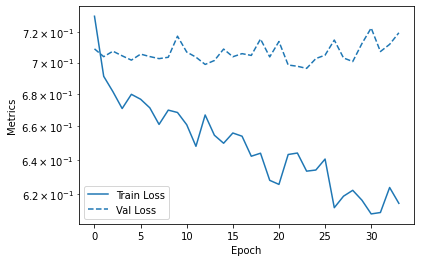

In [81]:
plot_metric(history, ['Loss',], 0,['loss',])

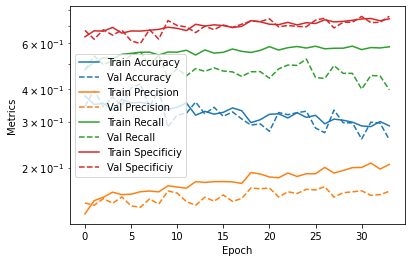

In [82]:
plot_metric(history, ['Accuracy', 'Precision','Recall', 'Specificiy'], 0,['masked_accuracy', 'masked_precision','masked_recall', 'masked_specificity'])

F1 Loss 

In [75]:
accuracyresultlist=[]
precisionresultlist=[]
recallresultlist=[]
specificity=[]
auclist=[]
flist=[]

accuracyresultlist_CT=[]
precisionresultlist_CT=[]
recallresultlist_CT=[]
specificity_CT=[]
flist_CT=[]

accuracyresultlist_T=[]
precisionresultlist_T=[]
recallresultlist_T=[]
specificity_T=[]
flist_T=[]

for train_index, validate_index in kfold.split(train_feature_df, train_label_df[antibitics_abx_list]):
    X=train_feature_df
    Y=train_label_df[antibitics_abx_list]
    x_train_tfidf = X.iloc[train_index]
    y_train_tfidf = Y.iloc[train_index]
    x_val_tfidf = X.iloc[validate_index]
    y_val_tfidf = Y.iloc[validate_index]
    x_train_tfidf=x_train_tfidf.reset_index(drop=True)
    y_train_tfidf=y_train_tfidf.reset_index(drop=True)
    x_val_tfidf=x_val_tfidf.reset_index(drop=True)
    y_val_tfidf=y_val_tfidf.reset_index(drop=True)
    sample_size = x_train_tfidf.values.shape[0] # number of samples in train set
    time_steps  = x_train_tfidf.values.shape[1] # number of features in train set
    input_dimension = 1               # each feature is represented by 1 number
    train_data_reshaped = x_train_tfidf.values.reshape(sample_size,time_steps,input_dimension)
    #x_test_tfidf = (x_test_tfidf.values)
    #y_test_tfidf=(y_test_tfidf.values)
    sample_size = x_val_tfidf.values.shape[0] # number of samples in train set
    time_steps  = x_val_tfidf.values.shape[1] # number of features in train set

    x_val_reshaped = x_val_tfidf.values.reshape(sample_size,time_steps,input_dimension)

    x_test_tfidf=test_feature_df.reset_index(drop=True)
    y_test_tfidf =test_label_df[antibitics_abx_list].reset_index(drop=True)
    sample_size = x_test_tfidf.values.shape[0] # number of samples in train set
    time_steps  = x_test_tfidf.values.shape[1] # number of features in train set
    test_data_reshaped =x_test_tfidf.values.reshape(sample_size,time_steps,input_dimension)

    #model = Tran_Model(train_data_reshaped)
    model=build_conv1D_model(train_data_reshaped)
    model.compile(loss=masked_SenSpeci_loss,
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                metrics=METRICS)
    
    history = model.fit(train_data_reshaped, y_train_tfidf, epochs=EPOCHS,validation_data=(x_val_reshaped, y_val_tfidf), callbacks=[es], verbose=1)
    results = model.evaluate(test_data_reshaped, y_test_tfidf, verbose=0)
    print(results)
    if (results[6] > best_result):
        model.save('output/Best_Model_F1lss_Masking')
        best_result=results[6]
    accuracyresultlist.append(results[1])
    precisionresultlist.append(results[2])
    recallresultlist.append(results[3])
    specificity.append(results[4])
    auclist.append(results[6])
    flist.append(results[5])
    
    ypredict = model.predict(test_data_reshaped)
    mask = K.cast(K.not_equal(y_test_tfidf, mask_value), K.floatx())
    mask_np=mask.numpy()
    Threshold_list=[0.5,0.5,0.5,0.5]
    for i in range(4):
        fpr, tpr, thres = roc_curve((y_test_tfidf.values*mask_np)[:, i], (ypredict*mask_np)[:, i])#test
        gmeans = sqrt(tpr * (1-fpr))
        ix = argmax(gmeans)
        Threshold_list[i]=thres[ix]
    
    accuracyresultlist_CT.append(masked_accuracy(y_test_tfidf,ypredict, model_threshold=np.mean(Threshold_list)).numpy())
    precisionresultlist_CT.append(masked_precision(y_test_tfidf.values,ypredict, model_threshold=np.mean(Threshold_list)).numpy())
    recallresultlist_CT.append(masked_recall(y_test_tfidf.values,ypredict, model_threshold=np.mean(Threshold_list)).numpy())
    specificity_CT.append(masked_specificity(y_test_tfidf.values,ypredict, model_threshold=np.mean(Threshold_list)).numpy())
    flist_CT.append(masked_f1(y_test_tfidf.values,ypredict, model_threshold=np.mean(Threshold_list)).numpy())

    accuracyresultlist_T.append(masked_accuracy(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())
    precisionresultlist_T.append(masked_precision(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())
    recallresultlist_T.append(masked_recall(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())
    specificity_T.append(masked_specificity(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())
    flist_T.append(masked_f1(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())


print(np.mean(accuracyresultlist),np.std(accuracyresultlist), np.mean(precisionresultlist),np.std(precisionresultlist), np.mean(recallresultlist), np.std(recallresultlist), np.mean(specificity), np.std(specificity), np.mean(auclist), np.std(auclist), np.mean(flist), np.std(flist))
print(np.mean(accuracyresultlist_CT),np.std(accuracyresultlist_CT), np.mean(precisionresultlist_CT),np.std(precisionresultlist_CT), np.mean(recallresultlist_CT), np.std(recallresultlist_CT), np.mean(specificity_CT), np.std(specificity_CT), np.mean(flist_CT), np.std(flist_CT))
print(np.mean(accuracyresultlist_T),np.std(accuracyresultlist_T), np.mean(precisionresultlist_T),np.std(precisionresultlist_T), np.mean(recallresultlist_T), np.std(recallresultlist_T), np.mean(specificity_T), np.std(specificity_T), np.mean(flist_T), np.std(flist_T))


Epoch 1/100
  1/248 [..............................] - ETA: 36s - loss: 0.7507 - masked_accuracy: 0.6094 - masked_precision: 0.0769 - masked_recall: 0.6000 - masked_specificity: 0.3898 - masked_f1: 0.1364 - masked_AUC: 0.5148

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


247/248 [============================>.] - ETA: 0s - loss: 0.7333 - masked_accuracy: 0.3629 - masked_precision: 0.1403 - masked_recall: 0.4816 - masked_specificity: 0.6513 - masked_f1: 0.2116 - masked_AUC: 0.5923 - ETA: 13s - loss: 0.7670 - masked_accuracy: 0.4045 - masked_precision: 0.1123 - masked_recall: 0.4634 - masked_specificity: 0.6030 - masked_f1: 0.1783 - masked_AUC: 0 - ETA: 12s - loss: 0.7562 - masked_accuracy: 0.3989 - masked_precision: 0.1136 - masked - ETA: 8s - los - ETA: 3s - loss: 0.7374 - masked_accuracy: 0.3656 - masked_precision: 0.1358 - masked_recall: 0.4797 - m - ETA: 1s - loss: 0.7328 - masked_accuracy: 0.3652 - masked_precision: 0.1387 - masked_recall: 0.4835 - masked_specificity:

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


248/248 [==============================] - 18s 72ms/step - loss: 0.7334 - masked_accuracy: 0.3634 - masked_precision: 0.1404 - masked_recall: 0.4817 - masked_specificity: 0.6507 - masked_f1: 0.2117 - masked_AUC: 0.5922 - val_loss: 0.7256 - val_masked_accuracy: 0.4598 - val_masked_precision: 0.1333 - val_masked_recall: 0.6041 - val_masked_specificity: 0.5566 - val_masked_f1: 0.2144 - val_masked_AUC: 0.6116
Epoch 2/100
248/248 [==============================] - 18s 73ms/step - loss: 0.6872 - masked_accuracy: 0.3536 - masked_precision: 0.1534 - masked_recall: 0.5122 - masked_specificity: 0.6652 - masked_f1: 0.2302 - masked_AUC: 0.6110 - val_loss: 0.7132 - val_masked_accuracy: 0.3308 - val_masked_precision: 0.1480 - val_masked_recall: 0.4844 - val_masked_specificity: 0.6867 - val_masked_f1: 0.2214 - val_masked_AUC: 0.6330- masked_accuracy: 0.351 - ETA: 1s - loss: 0.6861 - masked_accuracy: 0.3510 - masked_precision: 0.1537 - masked_recall: 0.5075 - masked_specificity: 0.6675 - masked_f1: 0 

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


[0.717454195022583, 0.37676411867141724, 0.13896788656711578, 0.4784400761127472, 0.6363312005996704, 0.21113519370555878, 0.5781705975532532]
Epoch 1/100
  1/248 [..............................] - ETA: 19s - loss: 0.7434 - masked_accuracy: 0.3047 - masked_precision: 0.0769 - masked_recall: 0.4286 - masked_specificity: 0.7025 - masked_f1: 0.1304 - masked_AUC: 0.7155

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


247/248 [============================>.] - ETA: 0s - loss: 0.7393 - masked_accuracy: 0.3853 - masked_precision: 0.1317 - masked_recall: 0.4772 - masked_specificity: 0.6258 - masked_f1: 0.2010 - masked_AUC: 0.5874

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


248/248 [==============================] - 18s 74ms/step - loss: 0.7394 - masked_accuracy: 0.3861 - masked_precision: 0.1321 - masked_recall: 0.4773 - masked_specificity: 0.6248 - masked_f1: 0.2014 - masked_AUC: 0.5866 - val_loss: 0.7212 - val_masked_accuracy: 0.4100 - val_masked_precision: 0.1255 - val_masked_recall: 0.4914 - val_masked_specificity: 0.6001 - val_masked_f1: 0.1957 - val_masked_AUC: 0.5897
Epoch 2/100
248/248 [==============================] - 18s 72ms/step - loss: 0.7012 - masked_accuracy: 0.3766 - masked_precision: 0.1403 - masked_recall: 0.5097 - masked_specificity: 0.6383 - masked_f1: 0.2153 - masked_AUC: 0.6132 - val_loss: 0.7078 - val_masked_accuracy: 0.4395 - val_masked_precision: 0.1326 - val_masked_recall: 0.5596 - val_masked_specificity: 0.5745 - val_masked_f1: 0.2101 - val_masked_AUC: 0.6122
Epoch 3/100
248/248 [==============================] - 18s 72ms/step - loss: 0.7016 - masked_accuracy: 0.3522 - masked_precision: 0.1485 - masked_recall: 0.5047 - masked_

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


[0.7360520958900452, 0.38399696350097656, 0.140443354845047, 0.49127498269081116, 0.6298872828483582, 0.21424438059329987, 0.5993067026138306]
Epoch 1/100
  2/248 [..............................] - ETA: 15s - loss: 0.7533 - masked_accuracy: 0.5234 - masked_precision: 0.0608 - masked_recall: 0.5079 - masked_specificity: 0.4756 - masked_f1: 0.1079 - masked_AUC: 0.4933

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


247/248 [============================>.] - ETA: 0s - loss: 0.7304 - masked_accuracy: 0.3778 - masked_precision: 0.1337 - masked_recall: 0.4773 - masked_specificity: 0.6336 - masked_f1: 0.2026 - masked_AUC: 0.5967

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


248/248 [==============================] - 18s 72ms/step - loss: 0.7306 - masked_accuracy: 0.3770 - masked_precision: 0.1331 - masked_recall: 0.4754 - masked_specificity: 0.6344 - masked_f1: 0.2018 - masked_AUC: 0.5943 - val_loss: 0.7090 - val_masked_accuracy: 0.3441 - val_masked_precision: 0.1466 - val_masked_recall: 0.4728 - val_masked_specificity: 0.6713 - val_masked_f1: 0.2179 - val_masked_AUC: 0.6224
Epoch 2/100
248/248 [==============================] - 18s 72ms/step - loss: 0.6912 - masked_accuracy: 0.3494 - masked_precision: 0.1497 - masked_recall: 0.5066 - masked_specificity: 0.6687 - masked_f1: 0.2265 - masked_AUC: 0.6435 - val_loss: 0.7039 - val_masked_accuracy: 0.3956 - val_masked_precision: 0.1438 - val_masked_recall: 0.5358 - val_masked_specificity: 0.6210 - val_masked_f1: 0.2216 - val_masked_AUC: 0.6217_accuracy: 0.3428 - masked_precision: 0.1544 - masked_reca
Epoch 3/100
248/248 [==============================] - 18s 72ms/step - loss: 0.6815 - masked_accuracy: 0.3528 - 

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


[0.724234938621521, 0.34488406777381897, 0.15580923855304718, 0.493970662355423, 0.6738603711128235, 0.23203420639038086, 0.5950801372528076]
0.36854838331540424 0.016991731001105743 0.14507349332173666 0.007615178742200797 0.4878952403863271 0.006775778961065998 0.646692951520284 0.019389559638875117 0.5908524791399637 0.00913194225862392 0.21913792689641318 0.009206964007953398
0.3629578 0.0043558097 0.14714384 0.006493016 0.49191508 0.019149719 0.64683366 0.014898932 0.22652209 0.009677372
0.37744227 0.020095466 0.14395086 0.0027932443 0.5000974 0.017320167 0.636647 0.0044467426 0.22344726 0.0020608134


In [91]:

print(np.mean(accuracyresultlist),np.std(accuracyresultlist), np.mean(precisionresultlist),np.std(precisionresultlist), np.mean(recallresultlist), np.std(recallresultlist), np.mean(specificity), np.std(specificity), np.mean(auclist), np.std(auclist), np.mean(flist), np.std(flist))
print(np.mean(accuracyresultlist_CT),np.std(accuracyresultlist_CT), np.mean(precisionresultlist_CT),np.std(precisionresultlist_CT), np.mean(recallresultlist_CT), np.std(recallresultlist_CT), np.mean(specificity_CT), np.std(specificity_CT), np.mean(flist_CT), np.std(flist_CT))
print(np.mean(accuracyresultlist_T),np.std(accuracyresultlist_T), np.mean(precisionresultlist_T),np.std(precisionresultlist_T), np.mean(recallresultlist_T), np.std(recallresultlist_T), np.mean(specificity_T), np.std(specificity_T), np.mean(flist_T), np.std(flist_T))

0.36854838331540424 0.016991731001105743 0.14507349332173666 0.007615178742200797 0.4878952403863271 0.006775778961065998 0.646692951520284 0.019389559638875117 0.5908524791399637 0.00913194225862392 0.21913792689641318 0.009206964007953398
0.3629578 0.0043558097 0.14714384 0.006493016 0.49191508 0.019149719 0.64683366 0.014898932 0.22652209 0.009677372
0.37744227 0.020095466 0.14395086 0.0027932443 0.5000974 0.017320167 0.636647 0.0044467426 0.22344726 0.0020608134


In [86]:
len(precisionresultlist)

3

In [87]:
Threshold_list

[0.82334876, 0.5297208, 0.0007135272, 2.3879793e-05]

In [88]:
np.mean(Threshold_list)

0.33845174

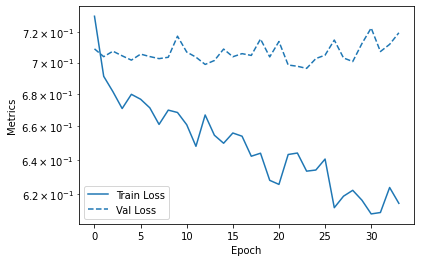

In [89]:
plot_metric(history, ['Loss',], 0,['loss',])

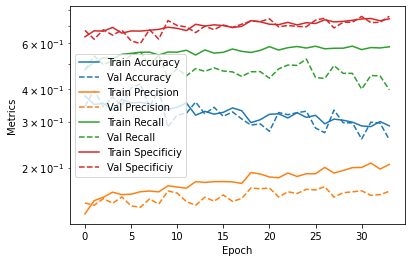

In [90]:
plot_metric(history, ['Accuracy', 'Precision','Recall', 'Specificiy'], 0,['masked_accuracy', 'masked_precision','masked_recall', 'masked_specificity'])

In [93]:
accuracyresultlist=[]
precisionresultlist=[]
recallresultlist=[]
specificity=[]
auclist=[]
flist=[]

accuracyresultlist_CT=[]
precisionresultlist_CT=[]
recallresultlist_CT=[]
specificity_CT=[]
flist_CT=[]

accuracyresultlist_T=[]
precisionresultlist_T=[]
recallresultlist_T=[]
specificity_T=[]
flist_T=[]

for train_index, validate_index in kfold.split(train_feature_df, train_label_df[antibitics_abx_list]):
    X=train_feature_df
    Y=train_label_df[antibitics_abx_list]
    x_train_tfidf = X.iloc[train_index]
    y_train_tfidf = Y.iloc[train_index]
    x_val_tfidf = X.iloc[validate_index]
    y_val_tfidf = Y.iloc[validate_index]
    x_train_tfidf=x_train_tfidf.reset_index(drop=True)
    y_train_tfidf=y_train_tfidf.reset_index(drop=True)
    x_val_tfidf=x_val_tfidf.reset_index(drop=True)
    y_val_tfidf=y_val_tfidf.reset_index(drop=True)
    sample_size = x_train_tfidf.values.shape[0] # number of samples in train set
    time_steps  = x_train_tfidf.values.shape[1] # number of features in train set
    input_dimension = 1               # each feature is represented by 1 number
    train_data_reshaped = x_train_tfidf.values.reshape(sample_size,time_steps,input_dimension)
    #x_test_tfidf = (x_test_tfidf.values)
    #y_test_tfidf=(y_test_tfidf.values)
    sample_size = x_val_tfidf.values.shape[0] # number of samples in train set
    time_steps  = x_val_tfidf.values.shape[1] # number of features in train set

    x_val_reshaped = x_val_tfidf.values.reshape(sample_size,time_steps,input_dimension)

    x_test_tfidf=test_feature_df.reset_index(drop=True)
    y_test_tfidf =test_label_df[antibitics_abx_list].reset_index(drop=True)
    sample_size = x_test_tfidf.values.shape[0] # number of samples in train set
    time_steps  = x_test_tfidf.values.shape[1] # number of features in train set
    test_data_reshaped =x_test_tfidf.values.reshape(sample_size,time_steps,input_dimension)

    #model = Tran_Model(train_data_reshaped)
    model=build_conv1D_model(train_data_reshaped)
    model.compile(loss=masked_TPTN_loss,
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                metrics=METRICS)
    
    history = model.fit(train_data_reshaped, y_train_tfidf, epochs=EPOCHS,validation_data=(x_val_reshaped, y_val_tfidf), callbacks=[es], verbose=1)
    results = model.evaluate(test_data_reshaped, y_test_tfidf, verbose=0)
    print(results)
    if (results[6] > best_result):
        model.save('output/Best_Model_TPTN_Masking')
        best_result=results[6]
    accuracyresultlist.append(results[1])
    precisionresultlist.append(results[2])
    recallresultlist.append(results[3])
    specificity.append(results[4])
    auclist.append(results[6])
    flist.append(results[5])
    
    ypredict = model.predict(test_data_reshaped)
    mask = K.cast(K.not_equal(y_test_tfidf, mask_value), K.floatx())
    mask_np=mask.numpy()
    Threshold_list=[0.5,0.5,0.5,0.5]
    for i in range(4):
        fpr, tpr, thres = roc_curve((y_test_tfidf.values*mask_np)[:, i], (ypredict*mask_np)[:, i])#test
        gmeans = sqrt(tpr * (1-fpr))
        ix = argmax(gmeans)
        Threshold_list[i]=thres[ix]
    
    accuracyresultlist_CT.append(masked_accuracy(y_test_tfidf,ypredict, model_threshold=np.mean(Threshold_list)).numpy())
    precisionresultlist_CT.append(masked_precision(y_test_tfidf.values,ypredict, model_threshold=np.mean(Threshold_list)).numpy())
    recallresultlist_CT.append(masked_recall(y_test_tfidf.values,ypredict, model_threshold=np.mean(Threshold_list)).numpy())
    specificity_CT.append(masked_specificity(y_test_tfidf.values,ypredict, model_threshold=np.mean(Threshold_list)).numpy())
    flist_CT.append(masked_f1(y_test_tfidf.values,ypredict, model_threshold=np.mean(Threshold_list)).numpy())

    accuracyresultlist_T.append(masked_accuracy(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())
    precisionresultlist_T.append(masked_precision(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())
    recallresultlist_T.append(masked_recall(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())
    specificity_T.append(masked_specificity(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())
    flist_T.append(masked_f1(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())


print(np.mean(accuracyresultlist),np.std(accuracyresultlist), np.mean(precisionresultlist),np.std(precisionresultlist), np.mean(recallresultlist), np.std(recallresultlist), np.mean(specificity), np.std(specificity), np.mean(auclist), np.std(auclist), np.mean(flist), np.std(flist))
print(np.mean(accuracyresultlist_CT),np.std(accuracyresultlist_CT), np.mean(precisionresultlist_CT),np.std(precisionresultlist_CT), np.mean(recallresultlist_CT), np.std(recallresultlist_CT), np.mean(specificity_CT), np.std(specificity_CT), np.mean(flist_CT), np.std(flist_CT))
print(np.mean(accuracyresultlist_T),np.std(accuracyresultlist_T), np.mean(precisionresultlist_T),np.std(precisionresultlist_T), np.mean(recallresultlist_T), np.std(recallresultlist_T), np.mean(specificity_T), np.std(specificity_T), np.mean(flist_T), np.std(flist_T))


Epoch 1/100
  1/248 [..............................] - ETA: 34s - loss: 0.4460 - masked_accuracy: 0.8359 - masked_precision: 0.0748 - masked_recall: 0.8000 - masked_specificity: 0.1610 - masked_f1: 0.1368 - masked_AUC: 0.5945

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


247/248 [============================>.] - ETA: 0s - loss: 0.2051 - masked_accuracy: 0.3777 - masked_precision: 0.1425 - masked_recall: 0.4981 - masked_specificity: 0.6365 - masked_f1: 0.2148 - masked_AUC: 0.5941 ETA: 6s - loss: 0.2224 - masked_accuracy: 0.4061 - masked_precision: 0.1350 - masked_recall: 0.5123 - masked_specificity: 0.6063 - masked_f1: 0.2069 -  - ETA: 6s - loss: 0.2250 - masked_accuracy: 0.3995 - masked_precision: 0.1353 - masked_recall: 0.5082 - masked_specificity: 0.6131 - masked_f1: 0.207 - ETA: 5s - loss: 0.2325 - masked_accuracy: 0.3970 - masked_precision: 0.1342 - masked_recall: 0.5038 - masked_specif - ETA: 3s - loss: 0.2174 - masked_accuracy: 0.3899 - masked_preci

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


248/248 [==============================] - 19s 75ms/step - loss: 0.2056 - masked_accuracy: 0.3777 - masked_precision: 0.1428 - masked_recall: 0.4981 - masked_specificity: 0.6366 - masked_f1: 0.2152 - masked_AUC: 0.5942 - val_loss: 0.1965 - val_masked_accuracy: 0.3728 - val_masked_precision: 0.1498 - val_masked_recall: 0.5580 - val_masked_specificity: 0.6475 - val_masked_f1: 0.2313 - val_masked_AUC: 0.6444
Epoch 2/100
248/248 [==============================] - 18s 75ms/step - loss: 0.1075 - masked_accuracy: 0.3618 - masked_precision: 0.1540 - masked_recall: 0.5329 - masked_specificity: 0.6581 - masked_f1: 0.2334 - masked_AUC: 0.6296 - val_loss: 0.1496 - val_masked_accuracy: 0.4028 - val_masked_precision: 0.1320 - val_masked_recall: 0.5224 - val_masked_specificity: 0.6108 - val_masked_f1: 0.2063 - val_masked_AUC: 0.6076f1: 0.2230 - masked_AUC: 0.61 - ETA: 8s - loss: 0.1213 - masked_accuracy: 0.3905 - masked_precision: 0.1437 - masked_recall: 0.5398 - masked_specificity: 0.6269 - mask - E

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


[0.12674008309841156, 0.37581905722618103, 0.14375104010105133, 0.4943067133426666, 0.6392457485198975, 0.21800178289413452, 0.5764285326004028]
Epoch 1/100
  2/248 [..............................] - ETA: 22s - loss: 0.5148 - masked_accuracy: 0.4062 - masked_precision: 0.0901 - masked_recall: 0.5143 - masked_specificity: 0.6031 - masked_f1: 0.1521 - masked_AUC: 0.5728

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


247/248 [============================>.] - ETA: 0s - loss: 0.2172 - masked_accuracy: 0.3912 - masked_precision: 0.1309 - masked_recall: 0.4822 - masked_specificity: 0.6197 - masked_f1: 0.1998 - masked_AUC: 0.5685 - ETA: 13s - loss: 0.3590 - masked_accuracy: 0.4880 - masked_precision: 0.0973 - masked_recall: 0.5106 - masked_specificity: 0.5134 - masked_f1: 0.1607 - masked_AU - ETA: 12s - loss: 0.3563 - masked_accuracy: 0.4820 - masked_precision: 0.0958 - mas - ETA: 8s - loss: 0.3022 - masked_accuracy: 0.4385 - masked_precision: 0.1121 - masked_recall: 0.4808 - masked_specificity: 0.5664  - ETA: 6s - loss: 0.2850 - masked_accuracy: 0.4321 - masked_precision: 0.1146 - masked_recall: 0.47 - ETA: 4s - loss: 0.2510 - masked_accuracy: 0.4060 - masked_precision: 0.1237 - masked_recall: 0.4767 - masked_specificity: 0.6024 - masked_f1: 0.1900 - masked_AUC - ETA: 4s - loss: 0.2499 - masked_accuracy: 0.4043 - masked_precision: 0.1236 - masked_recall: 0.4737 - masked_specificity: 0.6 - ETA: 2s - lo

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


248/248 [==============================] - 18s 74ms/step - loss: 0.2177 - masked_accuracy: 0.3920 - masked_precision: 0.1312 - masked_recall: 0.4823 - masked_specificity: 0.6188 - masked_f1: 0.2002 - masked_AUC: 0.5681 - val_loss: 0.1578 - val_masked_accuracy: 0.4217 - val_masked_precision: 0.1266 - val_masked_recall: 0.5103 - val_masked_specificity: 0.5891 - val_masked_f1: 0.1988 - val_masked_AUC: 0.5629
Epoch 2/100
248/248 [==============================] - 18s 74ms/step - loss: 0.1252 - masked_accuracy: 0.3820 - masked_precision: 0.1417 - masked_recall: 0.5246 - masked_specificity: 0.6339 - masked_f1: 0.2183 - masked_AUC: 0.5951 - val_loss: 0.1372 - val_masked_accuracy: 0.4561 - val_masked_precision: 0.1270 - val_masked_recall: 0.5563 - val_masked_specificity: 0.5559 - val_masked_f1: 0.2029 - val_masked_AUC: 0.5748- loss: 0.0909 - masked_accuracy: 0.4021 - masked_precision: 0.1470 - masked_recall: 0.5478 - masked_specificity: 0.6147 - masked_f1: 0.2 - ETA: 4s - loss: 0.1023 - masked

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


[0.157821923494339, 0.39822328090667725, 0.13270530104637146, 0.48063910007476807, 0.6126447319984436, 0.20376911759376526, 0.5593111515045166]
Epoch 1/100
  2/248 [..............................] - ETA: 19s - loss: 0.5313 - masked_accuracy: 0.5117 - masked_precision: 0.0774 - masked_recall: 0.6190 - masked_specificity: 0.4961 - masked_f1: 0.1371 - masked_AUC: 0.6000

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


247/248 [============================>.] - ETA: 0s - loss: 0.2113 - masked_accuracy: 0.3764 - masked_precision: 0.1355 - masked_recall: 0.4835 - masked_specificity: 0.6357 - masked_f1: 0.2057 - masked_AUC: 0.5783 - ETA: 11s - loss: 0.3199 - masked_accuracy: 0.4727 - masked_precision: 0.0994 - masked - ETA: 7s - loss: 0.2769 - masked_accuracy: 0.4102 - masked_precision: 0.1220 - masked_recall: 0.4745 - masked_specificity: 0.5965 - masked_f1: 0.1885 - ma - ETA: 7s - loss: 0.2744 - masked_accuracy: 0.3992 -  - ETA: 3s - loss: 0.2150 - masked_accuracy: 0.3793 - masked_precision: 0.1360 - masked_recall: 0.4804 - masked_specificity: 0.6321 - masked_f1: 0.2060 - masked_AUC - ETA: 3s - loss: 0.2158 - masked_accuracy: 0.3772 - masked_precision: 0.

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


248/248 [==============================] - 18s 74ms/step - loss: 0.2119 - masked_accuracy: 0.3753 - masked_precision: 0.1350 - masked_recall: 0.4816 - masked_specificity: 0.6367 - masked_f1: 0.2048 - masked_AUC: 0.5760 - val_loss: 0.1504 - val_masked_accuracy: 0.4010 - val_masked_precision: 0.1456 - val_masked_recall: 0.5552 - val_masked_specificity: 0.6168 - val_masked_f1: 0.2256 - val_masked_AUC: 0.6261
Epoch 2/100
248/248 [==============================] - 18s 73ms/step - loss: 0.1078 - masked_accuracy: 0.3454 - masked_precision: 0.1513 - masked_recall: 0.5103 - masked_specificity: 0.6735 - masked_f1: 0.2288 - masked_AUC: 0.6234 - val_loss: 0.1176 - val_masked_accuracy: 0.4230 - val_masked_precision: 0.1350 - val_masked_recall: 0.5378 - val_masked_specificity: 0.5911 - val_masked_f1: 0.2116 - val_masked_AUC: 0.5774 - masked_specificity: 0.6829 - masked_f1: 0.2343 - masked_AUC: 0. - ETA: 5s - loss: 0.1006 - masked_accuracy: 0.3387 - masked_precision: 0.1547 - masked_ - ETA: 3s - loss

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


[0.1371685266494751, 0.34655997157096863, 0.14725449681282043, 0.46818286180496216, 0.6687567234039307, 0.2192087322473526, 0.5789714455604553]
0.37353410323460895 0.021153252609421247 0.14123694598674774 0.00620001485343899 0.48104289174079895 0.010668839067526607 0.6402157346407572 0.022917890386891474 0.5715703765551249 0.008730523111921667 0.21365987757841745 0.007011159271276342
0.37243083 0.014281992 0.1434624 0.0021317804 0.4924995 0.025089929 0.6382434 0.014803197 0.2221418 0.005036451
0.38177705 0.032100394 0.14490056 0.005466172 0.50808495 0.025261799 0.6311413 0.010606431 0.22519527 0.0040952126


In [94]:
print(np.mean(accuracyresultlist),np.std(accuracyresultlist), np.mean(precisionresultlist),np.std(precisionresultlist), np.mean(recallresultlist), np.std(recallresultlist), np.mean(specificity), np.std(specificity), np.mean(auclist), np.std(auclist), np.mean(flist), np.std(flist))
print(np.mean(accuracyresultlist_CT),np.std(accuracyresultlist_CT), np.mean(precisionresultlist_CT),np.std(precisionresultlist_CT), np.mean(recallresultlist_CT), np.std(recallresultlist_CT), np.mean(specificity_CT), np.std(specificity_CT), np.mean(flist_CT), np.std(flist_CT))
print(np.mean(accuracyresultlist_T),np.std(accuracyresultlist_T), np.mean(precisionresultlist_T),np.std(precisionresultlist_T), np.mean(recallresultlist_T), np.std(recallresultlist_T), np.mean(specificity_T), np.std(specificity_T), np.mean(flist_T), np.std(flist_T))


0.37353410323460895 0.021153252609421247 0.14123694598674774 0.00620001485343899 0.48104289174079895 0.010668839067526607 0.6402157346407572 0.022917890386891474 0.5715703765551249 0.008730523111921667 0.21365987757841745 0.007011159271276342
0.37243083 0.014281992 0.1434624 0.0021317804 0.4924995 0.025089929 0.6382434 0.014803197 0.2221418 0.005036451
0.38177705 0.032100394 0.14490056 0.005466172 0.50808495 0.025261799 0.6311413 0.010606431 0.22519527 0.0040952126


In [95]:
Threshold_list, np.mean(Threshold_list)

([0.19790685, 0.14435947, 0.6308875, 0.0035083592], 0.24416554)

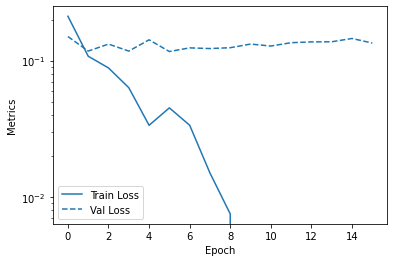

In [96]:
plot_metric(history, ['Loss',], 0,['loss',])

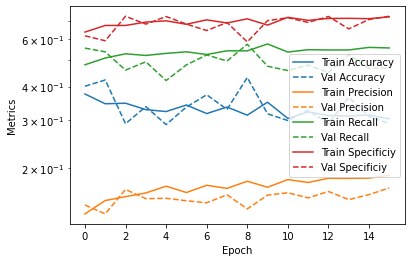

In [97]:
plot_metric(history, ['Accuracy', 'Precision','Recall', 'Specificiy'], 0,['masked_accuracy', 'masked_precision','masked_recall', 'masked_specificity'])

In [100]:
accuracyresultlist=[]
precisionresultlist=[]
recallresultlist=[]
specificity=[]
auclist=[]
flist=[]

accuracyresultlist_CT=[]
precisionresultlist_CT=[]
recallresultlist_CT=[]
specificity_CT=[]
flist_CT=[]

accuracyresultlist_T=[]
precisionresultlist_T=[]
recallresultlist_T=[]
specificity_T=[]
flist_T=[]

for train_index, validate_index in kfold.split(train_feature_df, train_label_df[antibitics_abx_list]):
    X=train_feature_df
    Y=train_label_df[antibitics_abx_list]
    x_train_tfidf = X.iloc[train_index]
    y_train_tfidf = Y.iloc[train_index]
    x_val_tfidf = X.iloc[validate_index]
    y_val_tfidf = Y.iloc[validate_index]
    x_train_tfidf=x_train_tfidf.reset_index(drop=True)
    y_train_tfidf=y_train_tfidf.reset_index(drop=True)
    x_val_tfidf=x_val_tfidf.reset_index(drop=True)
    y_val_tfidf=y_val_tfidf.reset_index(drop=True)
    sample_size = x_train_tfidf.values.shape[0] # number of samples in train set
    time_steps  = x_train_tfidf.values.shape[1] # number of features in train set
    input_dimension = 1               # each feature is represented by 1 number
    train_data_reshaped = x_train_tfidf.values.reshape(sample_size,time_steps,input_dimension)
    #x_test_tfidf = (x_test_tfidf.values)
    #y_test_tfidf=(y_test_tfidf.values)
    sample_size = x_val_tfidf.values.shape[0] # number of samples in train set
    time_steps  = x_val_tfidf.values.shape[1] # number of features in train set

    x_val_reshaped = x_val_tfidf.values.reshape(sample_size,time_steps,input_dimension)

    x_test_tfidf=test_feature_df.reset_index(drop=True)
    y_test_tfidf =test_label_df[antibitics_abx_list].reset_index(drop=True)
    sample_size = x_test_tfidf.values.shape[0] # number of samples in train set
    time_steps  = x_test_tfidf.values.shape[1] # number of features in train set
    test_data_reshaped =x_test_tfidf.values.reshape(sample_size,time_steps,input_dimension)

    #model = Tran_Model(train_data_reshaped)
    model=build_conv1D_model(train_data_reshaped)
    model.compile(loss=masked_TPPlusTN_loss,
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                metrics=METRICS)
    
    history = model.fit(train_data_reshaped, y_train_tfidf, epochs=EPOCHS,validation_data=(x_val_reshaped, y_val_tfidf), callbacks=[es], verbose=1)
    results = model.evaluate(test_data_reshaped, y_test_tfidf, verbose=0)
    print(results)
    if (results[6] > best_result):
        model.save('output/Best_Model_TPPlusTN_Masking')
        best_result=results[6]
    accuracyresultlist.append(results[1])
    precisionresultlist.append(results[2])
    recallresultlist.append(results[3])
    specificity.append(results[4])
    auclist.append(results[6])
    flist.append(results[5])
    
    ypredict = model.predict(test_data_reshaped)
    mask = K.cast(K.not_equal(y_test_tfidf, mask_value), K.floatx())
    mask_np=mask.numpy()
    Threshold_list=[0.5,0.5,0.5,0.5]
    for i in range(4):
        fpr, tpr, thres = roc_curve((y_test_tfidf.values*mask_np)[:, i], (ypredict*mask_np)[:, i])#test
        gmeans = sqrt(tpr * (1-fpr))
        ix = argmax(gmeans)
        Threshold_list[i]=thres[ix]
    
    accuracyresultlist_CT.append(masked_accuracy(y_test_tfidf,ypredict, model_threshold=np.mean(Threshold_list)).numpy())
    precisionresultlist_CT.append(masked_precision(y_test_tfidf.values,ypredict, model_threshold=np.mean(Threshold_list)).numpy())
    recallresultlist_CT.append(masked_recall(y_test_tfidf.values,ypredict, model_threshold=np.mean(Threshold_list)).numpy())
    specificity_CT.append(masked_specificity(y_test_tfidf.values,ypredict, model_threshold=np.mean(Threshold_list)).numpy())
    flist_CT.append(masked_f1(y_test_tfidf.values,ypredict, model_threshold=np.mean(Threshold_list)).numpy())

    accuracyresultlist_T.append(masked_accuracy(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())
    precisionresultlist_T.append(masked_precision(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())
    recallresultlist_T.append(masked_recall(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())
    specificity_T.append(masked_specificity(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())
    flist_T.append(masked_f1(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())


print(np.mean(accuracyresultlist),np.std(accuracyresultlist), np.mean(precisionresultlist),np.std(precisionresultlist), np.mean(recallresultlist), np.std(recallresultlist), np.mean(specificity), np.std(specificity), np.mean(auclist), np.std(auclist), np.mean(flist), np.std(flist))
print(np.mean(accuracyresultlist_CT),np.std(accuracyresultlist_CT), np.mean(precisionresultlist_CT),np.std(precisionresultlist_CT), np.mean(recallresultlist_CT), np.std(recallresultlist_CT), np.mean(specificity_CT), np.std(specificity_CT), np.mean(flist_CT), np.std(flist_CT))
print(np.mean(accuracyresultlist_T),np.std(accuracyresultlist_T), np.mean(precisionresultlist_T),np.std(precisionresultlist_T), np.mean(recallresultlist_T), np.std(recallresultlist_T), np.mean(specificity_T), np.std(specificity_T), np.mean(flist_T), np.std(flist_T))


Epoch 1/100
  1/248 [..............................] - ETA: 34s - loss: 0.5067 - masked_accuracy: 0.6016 - masked_precision: 0.0909 - masked_recall: 0.7000 - masked_specificity: 0.4068 - masked_f1: 0.1609 - masked_AUC: 0.6521

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


247/248 [============================>.] - ETA: 0s - loss: 0.1152 - masked_accuracy: 0.0058 - masked_precision: 0.0040 - masked_recall: 0.0073 - masked_specificity: 0.9943 - masked_f1: 0.0043 - masked_AUC: 0.5090 ETA: 9s - loss: 0.1336 - masked_accuracy: 0.0153 - 

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


248/248 [==============================] - 19s 76ms/step - loss: 0.1152 - masked_accuracy: 0.0058 - masked_precision: 0.0039 - masked_recall: 0.0073 - masked_specificity: 0.9943 - masked_f1: 0.0043 - masked_AUC: 0.5090 - val_loss: 0.1015 - val_masked_accuracy: 0.0000e+00 - val_masked_precision: 0.0000e+00 - val_masked_recall: 0.0000e+00 - val_masked_specificity: 1.0000 - val_masked_f1: 0.0000e+00 - val_masked_AUC: 0.5000
Epoch 2/100
248/248 [==============================] - 19s 76ms/step - loss: 0.1039 - masked_accuracy: 0.0000e+00 - masked_precision: 0.0000e+00 - masked_recall: 0.0000e+00 - masked_specificity: 1.0000 - masked_f1: 0.0000e+00 - masked_AUC: 0.5000 - val_loss: 0.1015 - val_masked_accuracy: 0.0000e+00 - val_masked_precision: 0.0000e+00 - val_masked_recall: 0.0000e+00 - val_masked_specificity: 1.0000 - val_masked_f1: 0.0000e+00 - val_masked_AUC: 0.5000ccuracy: 0.0000e+00 - masked_precision: 0.0000e+00 -  - ETA: 8s - loss: 0.1024 - masked_accuracy: 0.0000e+00 - masked_preci

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


[0.10853844881057739, 0.0, 0.0, 0.0, 1.0, 0.0, 0.5]
Epoch 1/100
  2/248 [..............................] - ETA: 19s - loss: 0.4980 - masked_accuracy: 0.4336 - masked_precision: 0.0416 - masked_recall: 0.3357 - masked_specificity: 0.5573 - masked_f1: 0.0734 - masked_AUC: 0.4361

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


247/248 [============================>.] - ETA: 0s - loss: 0.1164 - masked_accuracy: 0.0047 - masked_precision: 0.0012 - masked_recall: 0.0037 - masked_specificity: 0.9952 - masked_f1: 0.0015 - masked_AUC: 0.4945 - ETA: 14s - loss: 0.2403 - masked_accuracy: 0.0506 - masked_precision: 0.0127 - masked_recall: 0.0401 - masked_specificity: 0.9484 - masked_f1: 0.0160 - masked_AUC: 0.4 - ETA: 13s - loss: 0.2213 - masked_accuracy: 0.0448 - masked_precision: 0.011 - ETA: 8s - loss: 0.1324 - masked_accuracy: 0.0110 - masked_precision: 0.0028 - - ETA: 5s - loss: 0.1220 - masked_accurac - ETA: 1s - loss: 0.1177 - masked_accuracy: 0.0053 - masked_precision: 0.0013 - masked_recall: 0.0042 - masked_specificit

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


248/248 [==============================] - 18s 74ms/step - loss: 0.1165 - masked_accuracy: 0.0047 - masked_precision: 0.0012 - masked_recall: 0.0037 - masked_specificity: 0.9952 - masked_f1: 0.0015 - masked_AUC: 0.4945 - val_loss: 0.1031 - val_masked_accuracy: 0.0000e+00 - val_masked_precision: 0.0000e+00 - val_masked_recall: 0.0000e+00 - val_masked_specificity: 1.0000 - val_masked_f1: 0.0000e+00 - val_masked_AUC: 0.5000
Epoch 2/100
248/248 [==============================] - 18s 74ms/step - loss: 0.1030 - masked_accuracy: 0.0000e+00 - masked_precision: 0.0000e+00 - masked_recall: 0.0000e+00 - masked_specificity: 1.0000 - masked_f1: 0.0000e+00 - masked_AUC: 0.5000 - val_loss: 0.1031 - val_masked_accuracy: 0.0000e+00 - val_masked_precision: 0.0000e+00 - val_masked_recall: 0.0000e+00 - val_masked_specificity: 1.0000 - val_masked_f1: 0.0000e+00 - val_masked_AUC: 0.5000: 0.0000e+ - ETA: 1s - loss: 0.1048 - masked_accuracy: 0.0000e+00 - masked_precision: 0.0000e+00 - masked_recall: 0.0000e+0

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


[0.10853845626115799, 0.0, 0.0, 0.0, 1.0, 0.0, 0.5]
Epoch 1/100
  2/248 [..............................] - ETA: 17s - loss: 0.4950 - masked_accuracy: 0.4023 - masked_precision: 0.0235 - masked_recall: 0.2857 - masked_specificity: 0.5897 - masked_f1: 0.0435 - masked_AUC: 0.5272

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


247/248 [============================>.] - ETA: 0s - loss: 0.1125 - masked_accuracy: 0.0034 - masked_precision: 0.0010 - masked_recall: 0.0026 - masked_specificity: 0.9965 - masked_f1: 7.2010e-04 - masked_AUC: 0.4972TA: 14s - loss: 0.1911 - masked_accuracy: 0.0315 - masked_precision: 0.0092 - masked_recall: 0.0233 - masked_specificity: 0.9680  - ETA: 11s - loss: 0.1366 - masked_accuracy: 0.0118 - m - ETA: 6s - loss: 0.1213 - masked_accuracy: 0.0060 - masked_precision: 0.0017 - masked_recall: 0.0044 - masked_specificity: 0.9939 - masked_f1: 0

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


248/248 [==============================] - 19s 76ms/step - loss: 0.1124 - masked_accuracy: 0.0034 - masked_precision: 9.9620e-04 - masked_recall: 0.0025 - masked_specificity: 0.9965 - masked_f1: 7.1720e-04 - masked_AUC: 0.4952 - val_loss: 0.1046 - val_masked_accuracy: 0.0000e+00 - val_masked_precision: 0.0000e+00 - val_masked_recall: 0.0000e+00 - val_masked_specificity: 1.0000 - val_masked_f1: 0.0000e+00 - val_masked_AUC: 0.5000
Epoch 2/100
248/248 [==============================] - 19s 75ms/step - loss: 0.1023 - masked_accuracy: 0.0000e+00 - masked_precision: 0.0000e+00 - masked_recall: 0.0000e+00 - masked_specificity: 1.0000 - masked_f1: 0.0000e+00 - masked_AUC: 0.4980 - val_loss: 0.1046 - val_masked_accuracy: 0.0000e+00 - val_masked_precision: 0.0000e+00 - val_masked_recall: 0.0000e+00 - val_masked_specificity: 1.0000 - val_masked_f1: 0.0000e+00 - val_masked_AUC: 0.5000- masked_precision: 0.0000e+00 - masked_recall: 0.0000e+ - ETA: 8s - loss: 0.1038 - masked_accuracy: 0.0000e+00 - m

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


[0.10853875428438187, 0.0, 0.0, 0.0, 1.0, 0.0, 0.5]
0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.5 0.0 0.0 0.0
0.38742283 0.05782575 0.114533745 0.014080458 0.40132475 0.01363447 0.7231701 0.033510648 0.17745404 0.015427324
0.45984522 0.005913031 0.1007902 0.00067624653 0.42704073 0.007610372 0.6831457 0.0026802958 0.16308409 0.0013741421


In [105]:
print(np.mean(accuracyresultlist),np.std(accuracyresultlist), np.mean(precisionresultlist),np.std(precisionresultlist), np.mean(recallresultlist), np.std(recallresultlist), np.mean(specificity), np.std(specificity), np.mean(auclist), np.std(auclist), np.mean(flist), np.std(flist))
print(np.mean(accuracyresultlist_CT),np.std(accuracyresultlist_CT), np.mean(precisionresultlist_CT),np.std(precisionresultlist_CT), np.mean(recallresultlist_CT), np.std(recallresultlist_CT), np.mean(specificity_CT), np.std(specificity_CT), np.mean(flist_CT), np.std(flist_CT))
print(np.mean(accuracyresultlist_T),np.std(accuracyresultlist_T), np.mean(precisionresultlist_T),np.std(precisionresultlist_T), np.mean(recallresultlist_T), np.std(recallresultlist_T), np.mean(specificity_T), np.std(specificity_T), np.mean(flist_T), np.std(flist_T))


0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.5 0.0 0.0 0.0
0.38742283 0.05782575 0.114533745 0.014080458 0.40132475 0.01363447 0.7231701 0.033510648 0.17745404 0.015427324
0.45984522 0.005913031 0.1007902 0.00067624653 0.42704073 0.007610372 0.6831457 0.0026802958 0.16308409 0.0013741421


In [102]:
Threshold_list, np.mean(Threshold_list)

([8.072791e-07, 4.972692e-07, 1.0539764e-08, 1.01853e-07], 3.5423525e-07)

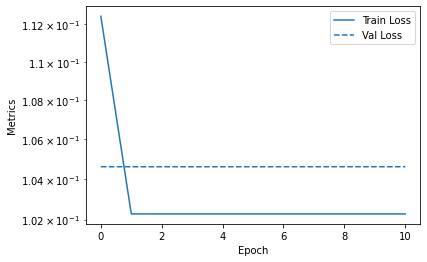

In [103]:
plot_metric(history, ['Loss',], 0,['loss',])

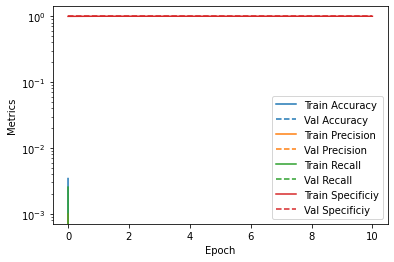

In [104]:
plot_metric(history, ['Accuracy', 'Precision','Recall', 'Specificiy'], 0,['masked_accuracy', 'masked_precision','masked_recall', 'masked_specificity'])

In [109]:
accuracyresultlist=[]
precisionresultlist=[]
recallresultlist=[]
specificity=[]
auclist=[]
flist=[]

accuracyresultlist_CT=[]
precisionresultlist_CT=[]
recallresultlist_CT=[]
specificity_CT=[]
flist_CT=[]

accuracyresultlist_T=[]
precisionresultlist_T=[]
recallresultlist_T=[]
specificity_T=[]
flist_T=[]

for train_index, validate_index in kfold.split(train_feature_df, train_label_df[antibitics_abx_list]):
    X=train_feature_df
    Y=train_label_df[antibitics_abx_list]
    x_train_tfidf = X.iloc[train_index]
    y_train_tfidf = Y.iloc[train_index]
    x_val_tfidf = X.iloc[validate_index]
    y_val_tfidf = Y.iloc[validate_index]
    x_train_tfidf=x_train_tfidf.reset_index(drop=True)
    y_train_tfidf=y_train_tfidf.reset_index(drop=True)
    x_val_tfidf=x_val_tfidf.reset_index(drop=True)
    y_val_tfidf=y_val_tfidf.reset_index(drop=True)
    sample_size = x_train_tfidf.values.shape[0] # number of samples in train set
    time_steps  = x_train_tfidf.values.shape[1] # number of features in train set
    input_dimension = 1               # each feature is represented by 1 number
    train_data_reshaped = x_train_tfidf.values.reshape(sample_size,time_steps,input_dimension)
    #x_test_tfidf = (x_test_tfidf.values)
    #y_test_tfidf=(y_test_tfidf.values)
    sample_size = x_val_tfidf.values.shape[0] # number of samples in train set
    time_steps  = x_val_tfidf.values.shape[1] # number of features in train set

    x_val_reshaped = x_val_tfidf.values.reshape(sample_size,time_steps,input_dimension)

    x_test_tfidf=test_feature_df.reset_index(drop=True)
    y_test_tfidf =test_label_df[antibitics_abx_list].reset_index(drop=True)
    sample_size = x_test_tfidf.values.shape[0] # number of samples in train set
    time_steps  = x_test_tfidf.values.shape[1] # number of features in train set
    test_data_reshaped =x_test_tfidf.values.reshape(sample_size,time_steps,input_dimension)

    #model = Tran_Model(train_data_reshaped)
    model=build_conv1D_model(train_data_reshaped)
    model.compile(loss=masked_f1_loss,
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                metrics=METRICS)
    
    history = model.fit(train_data_reshaped, y_train_tfidf, epochs=EPOCHS,validation_data=(x_val_reshaped, y_val_tfidf), callbacks=[es], verbose=1)
    results = model.evaluate(test_data_reshaped, y_test_tfidf, verbose=0)
    print(results)
    if (results[6] > best_result):
        model.save('output/Best_Model_F1')
        best_result=results[6]
    accuracyresultlist.append(results[1])
    precisionresultlist.append(results[2])
    recallresultlist.append(results[3])
    specificity.append(results[4])
    auclist.append(results[6])
    flist.append(results[5])
    
    ypredict = model.predict(test_data_reshaped)
    mask = K.cast(K.not_equal(y_test_tfidf, mask_value), K.floatx())
    mask_np=mask.numpy()
    Threshold_list=[0.5,0.5,0.5,0.5]
    for i in range(4):
        fpr, tpr, thres = roc_curve((y_test_tfidf.values*mask_np)[:, i], (ypredict*mask_np)[:, i])#test
        gmeans = sqrt(tpr * (1-fpr))
        ix = argmax(gmeans)
        Threshold_list[i]=thres[ix]
    
    accuracyresultlist_CT.append(masked_accuracy(y_test_tfidf,ypredict, model_threshold=np.mean(Threshold_list)).numpy())
    precisionresultlist_CT.append(masked_precision(y_test_tfidf.values,ypredict, model_threshold=np.mean(Threshold_list)).numpy())
    recallresultlist_CT.append(masked_recall(y_test_tfidf.values,ypredict, model_threshold=np.mean(Threshold_list)).numpy())
    specificity_CT.append(masked_specificity(y_test_tfidf.values,ypredict, model_threshold=np.mean(Threshold_list)).numpy())
    flist_CT.append(masked_f1(y_test_tfidf.values,ypredict, model_threshold=np.mean(Threshold_list)).numpy())

    accuracyresultlist_T.append(masked_accuracy(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())
    precisionresultlist_T.append(masked_precision(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())
    recallresultlist_T.append(masked_recall(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())
    specificity_T.append(masked_specificity(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())
    flist_T.append(masked_f1(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())


print(np.mean(accuracyresultlist),np.std(accuracyresultlist), np.mean(precisionresultlist),np.std(precisionresultlist), np.mean(recallresultlist), np.std(recallresultlist), np.mean(specificity), np.std(specificity), np.mean(auclist), np.std(auclist), np.mean(flist), np.std(flist))
print(np.mean(accuracyresultlist_CT),np.std(accuracyresultlist_CT), np.mean(precisionresultlist_CT),np.std(precisionresultlist_CT), np.mean(recallresultlist_CT), np.std(recallresultlist_CT), np.mean(specificity_CT), np.std(specificity_CT), np.mean(flist_CT), np.std(flist_CT))
print(np.mean(accuracyresultlist_T),np.std(accuracyresultlist_T), np.mean(precisionresultlist_T),np.std(precisionresultlist_T), np.mean(recallresultlist_T), np.std(recallresultlist_T), np.mean(specificity_T), np.std(specificity_T), np.mean(flist_T), np.std(flist_T))


Epoch 1/100
  1/248 [..............................] - ETA: 34s - loss: 0.8745 - masked_accuracy: 0.4141 - masked_precision: 0.0943 - masked_recall: 0.5000 - masked_specificity: 0.5932 - masked_f1: 0.1587 - masked_AUC: 0.5220

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


247/248 [============================>.] - ETA: 0s - loss: 0.8132 - masked_accuracy: 0.5707 - masked_precision: 0.1510 - masked_recall: 0.8340 - masked_specificity: 0.4584 - masked_f1: 0.2521 - masked_AUC: 0.6662 - ETA: 12s - loss: 0.8307 - masked_accuracy: 0.6317 - masked_precision: 0.1364 - masked_recall: 0.8402 - masked_specificity: 0.3910 - masked_f1: 0.2318 - ma - ETA: 11s - loss: 0.8220 - masked_accuracy: 0.6234 - masked_precision: 0.1396 - masked_recall: 0.8395 - masked - ETA: 8s - loss: 0.8153 - masked_accuracy: 0.5981 - masked_precision: 0.1448 - masked_recall: 0.8354 - masked_sp - ETA: 6s - loss: 0.8152 - masked_accuracy: 0.6086 - masked_precision: 0.1426 - masked_recall: 0.8479 - masked_specificity: 0.4172 - mask

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


248/248 [==============================] - 19s 77ms/step - loss: 0.8131 - masked_accuracy: 0.5704 - masked_precision: 0.1517 - masked_recall: 0.8347 - masked_specificity: 0.4589 - masked_f1: 0.2531 - masked_AUC: 0.6667 - val_loss: 0.8734 - val_masked_accuracy: 0.5000 - val_masked_precision: 0.1501 - val_masked_recall: 0.7635 - val_masked_specificity: 0.5271 - val_masked_f1: 0.2469 - val_masked_AUC: 0.6450
Epoch 2/100
248/248 [==============================] - 19s 79ms/step - loss: 0.7918 - masked_accuracy: 0.5393 - masked_precision: 0.1567 - masked_recall: 0.8315 - masked_specificity: 0.4928 - masked_f1: 0.2603 - masked_AUC: 0.6677 - val_loss: 0.7954 - val_masked_accuracy: 0.5823 - val_masked_precision: 0.1464 - val_masked_recall: 0.8533 - val_masked_specificity: 0.4469 - val_masked_f1: 0.2464 - val_masked_AUC: 0.6567asked_accuracy: 0.5000 - masked_precision: 0.1546 - masked_recall: 0.7612 - masked_specificity: 0.5283 - masked_f1: 0.2523 - masked_A - ETA: 14s - loss: 0.8723 - masked_ac

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


[0.7939348816871643, 0.5492061376571655, 0.15280863642692566, 0.7888619899749756, 0.4783276915550232, 0.2528356909751892, 0.6390718221664429]
Epoch 1/100
  2/248 [..............................] - ETA: 13s - loss: 0.8873 - masked_accuracy: 0.3945 - masked_precision: 0.0661 - masked_recall: 0.4571 - masked_specificity: 0.6075 - masked_f1: 0.1138 - masked_AUC: 0.5346

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


247/248 [============================>.] - ETA: 0s - loss: 0.8201 - masked_accuracy: 0.7732 - masked_precision: 0.1214 - masked_recall: 0.8924 - masked_specificity: 0.2401 - masked_f1: 0.2101 - masked_AUC: 0.6643 ETA: 4s - loss: 0.8264 - masked_accuracy: 0.8374 - masked_precision: 0.1102 - masked_recall: 0. - ETA: 2s - loss: 0.8234 - masked_accuracy: 0.8120 - masked_precision: 0.1143 - masked_recall: 0.9038 - masked_specificity: 0.1980 - masked_f1: 0.2000 - masked_AUC - ETA: 2s - loss: 0.8227 - masked_accuracy: 0.8088 - masked_precision: 0.1153 - masked_recall: 0.9026 -

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


248/248 [==============================] - 19s 77ms/step - loss: 0.8201 - masked_accuracy: 0.7723 - masked_precision: 0.1221 - masked_recall: 0.8915 - masked_specificity: 0.2412 - masked_f1: 0.2109 - masked_AUC: 0.6641 - val_loss: 0.7915 - val_masked_accuracy: 0.5188 - val_masked_precision: 0.1592 - val_masked_recall: 0.8160 - val_masked_specificity: 0.5139 - val_masked_f1: 0.2628 - val_masked_AUC: 0.6585
Epoch 2/100
248/248 [==============================] - 19s 77ms/step - loss: 0.7858 - masked_accuracy: 0.5456 - masked_precision: 0.1538 - masked_recall: 0.8322 - masked_specificity: 0.4855 - masked_f1: 0.2562 - masked_AUC: 0.6675 - val_loss: 0.7833 - val_masked_accuracy: 0.5279 - val_masked_precision: 0.1587 - val_masked_recall: 0.8258 - val_masked_specificity: 0.5050 - val_masked_f1: 0.2627 - val_masked_AUC: 0.6647recall: 0.8321 - masked_ - ETA: 1s - loss: 0.7839 - masked_accuracy: 0.5473 - masked_precision: 0.1553 - masked_recall: 0.8298 - masked_specificity: 0.4840 - masked
Epoch 

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


[0.7906442284584045, 0.5457409024238586, 0.15417373180389404, 0.7906396389007568, 0.4824380576610565, 0.2547484040260315, 0.6336579918861389]
Epoch 1/100
  2/248 [..............................] - ETA: 16s - loss: 0.8913 - masked_accuracy: 0.4961 - masked_precision: 0.0637 - masked_recall: 0.4921 - masked_specificity: 0.5044 - masked_f1: 0.1125 - masked_AUC: 0.5140

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


247/248 [============================>.] - ETA: 0s - loss: 0.8064 - masked_accuracy: 0.6519 - masked_precision: 0.1376 - masked_recall: 0.8593 - masked_specificity: 0.3707 - masked_f1: 0.2331 - masked_AUC: 0.6747 - ETA: 14s - loss: 0.8417 - masked_accuracy: 0.7486 - masked_precision: 0.1049 - masked_recall: 0.8008 - - ETA: 10s - loss: 0.8209 - masked_accuracy: 0.8212 - masked_precision: 0.1163 - masked_recall: 0.9064 - masked_specificity: 0.1887 - masked_f1: 0.2032 - masked_AUC: 0.667 - ETA: 10s - loss: 0.8197 - masked_accuracy: 0.8185 - masked_precision: 0.1174 - masked_recall: 0.9053 - masked_sp - ETA: 7s - loss: 0.8152 - masked_accuracy: 0.7403 - masked_pre - ETA: 4s - loss: 0.8048 - masked_accuracy: 0.6785 - masked - ETA: 0s - loss: 0.8046 - masked_accuracy: 0.6554 - masked_precision: 0.1376 - masked_recall: 0.8602 - masked_specificity: 0.3671 - masked_f1: 0.2331 - masked

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


248/248 [==============================] - 19s 77ms/step - loss: 0.8065 - masked_accuracy: 0.6513 - masked_precision: 0.1370 - masked_recall: 0.8559 - masked_specificity: 0.3713 - masked_f1: 0.2322 - masked_AUC: 0.6720 - val_loss: 0.7792 - val_masked_accuracy: 0.5205 - val_masked_precision: 0.1611 - val_masked_recall: 0.8215 - val_masked_specificity: 0.5126 - val_masked_f1: 0.2656 - val_masked_AUC: 0.7001
Epoch 2/100
248/248 [==============================] - 19s 76ms/step - loss: 0.7873 - masked_accuracy: 0.5475 - masked_precision: 0.1520 - masked_recall: 0.8273 - masked_specificity: 0.4832 - masked_f1: 0.2536 - masked_AUC: 0.6672 - val_loss: 0.7773 - val_masked_accuracy: 0.5719 - val_masked_precision: 0.1544 - val_masked_recall: 0.8587 - val_masked_specificity: 0.4601 - val_masked_f1: 0.2583 - val_masked_AUC: 0.7010
Epoch 3/100
248/248 [==============================] - 19s 77ms/step - loss: 0.7805 - masked_accuracy: 0.5522 - masked_precision: 0.1534 - masked_recall: 0.8422 - masked_

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


[0.7858175039291382, 0.3844127953052521, 0.1811773031949997, 0.6501437425613403, 0.6472182273864746, 0.2789873778820038, 0.676683783531189]
0.49311994512875873 0.07688057960615838 0.16271989047527313 0.013063254688292603 0.7432151238123575 0.06581540607337559 0.5359946588675181 0.07866483934155787 0.6498045325279236 0.019134575867582247 0.26219049096107483 0.011902833709655619
0.49606696 0.07321801 0.16247259 0.012307405 0.7342684 0.05923745 0.53454024 0.07714145 0.2650659 0.011859256
0.4177874 0.01572139 0.12890996 0.0072539514 0.49522698 0.013407099 0.576673 0.036757115 0.20452257 0.010112811


In [110]:
print(np.mean(accuracyresultlist),np.std(accuracyresultlist), np.mean(precisionresultlist),np.std(precisionresultlist), np.mean(recallresultlist), np.std(recallresultlist), np.mean(specificity), np.std(specificity), np.mean(auclist), np.std(auclist), np.mean(flist), np.std(flist))
print(np.mean(accuracyresultlist_CT),np.std(accuracyresultlist_CT), np.mean(precisionresultlist_CT),np.std(precisionresultlist_CT), np.mean(recallresultlist_CT), np.std(recallresultlist_CT), np.mean(specificity_CT), np.std(specificity_CT), np.mean(flist_CT), np.std(flist_CT))
print(np.mean(accuracyresultlist_T),np.std(accuracyresultlist_T), np.mean(precisionresultlist_T),np.std(precisionresultlist_T), np.mean(recallresultlist_T), np.std(recallresultlist_T), np.mean(specificity_T), np.std(specificity_T), np.mean(flist_T), np.std(flist_T))


0.49311994512875873 0.07688057960615838 0.16271989047527313 0.013063254688292603 0.7432151238123575 0.06581540607337559 0.5359946588675181 0.07866483934155787 0.6498045325279236 0.019134575867582247 0.26219049096107483 0.011902833709655619
0.49606696 0.07321801 0.16247259 0.012307405 0.7342684 0.05923745 0.53454024 0.07714145 0.2650659 0.011859256
0.4177874 0.01572139 0.12890996 0.0072539514 0.49522698 0.013407099 0.576673 0.036757115 0.20452257 0.010112811


In [111]:
Threshold_list, np.mean(Threshold_list)

([0.59642565, 0.9998255, 9.047062e-08, 8.618174e-08], 0.39906284)

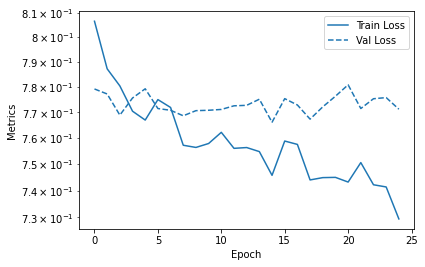

In [112]:
plot_metric(history, ['Loss',], 0,['loss',])

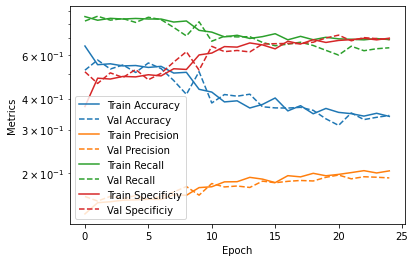

In [113]:
plot_metric(history, ['Accuracy', 'Precision','Recall', 'Specificiy'], 0,['masked_accuracy', 'masked_precision','masked_recall', 'masked_specificity'])

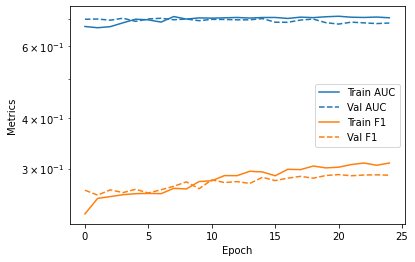

In [114]:
plot_metric(history, ['AUC', 'F1'], 0,['masked_AUC', 'masked_f1'])

In [115]:
accuracyresultlist=[]
precisionresultlist=[]
recallresultlist=[]
specificity=[]
auclist=[]
flist=[]

accuracyresultlist_CT=[]
precisionresultlist_CT=[]
recallresultlist_CT=[]
specificity_CT=[]
flist_CT=[]

accuracyresultlist_T=[]
precisionresultlist_T=[]
recallresultlist_T=[]
specificity_T=[]
flist_T=[]

for train_index, validate_index in kfold.split(train_feature_df, train_label_df[antibitics_abx_list]):
    X=train_feature_df
    Y=train_label_df[antibitics_abx_list]
    x_train_tfidf = X.iloc[train_index]
    y_train_tfidf = Y.iloc[train_index]
    x_val_tfidf = X.iloc[validate_index]
    y_val_tfidf = Y.iloc[validate_index]
    x_train_tfidf=x_train_tfidf.reset_index(drop=True)
    y_train_tfidf=y_train_tfidf.reset_index(drop=True)
    x_val_tfidf=x_val_tfidf.reset_index(drop=True)
    y_val_tfidf=y_val_tfidf.reset_index(drop=True)
    sample_size = x_train_tfidf.values.shape[0] # number of samples in train set
    time_steps  = x_train_tfidf.values.shape[1] # number of features in train set
    input_dimension = 1               # each feature is represented by 1 number
    train_data_reshaped = x_train_tfidf.values.reshape(sample_size,time_steps,input_dimension)
    #x_test_tfidf = (x_test_tfidf.values)
    #y_test_tfidf=(y_test_tfidf.values)
    sample_size = x_val_tfidf.values.shape[0] # number of samples in train set
    time_steps  = x_val_tfidf.values.shape[1] # number of features in train set

    x_val_reshaped = x_val_tfidf.values.reshape(sample_size,time_steps,input_dimension)

    x_test_tfidf=test_feature_df.reset_index(drop=True)
    y_test_tfidf =test_label_df[antibitics_abx_list].reset_index(drop=True)
    sample_size = x_test_tfidf.values.shape[0] # number of samples in train set
    time_steps  = x_test_tfidf.values.shape[1] # number of features in train set
    test_data_reshaped =x_test_tfidf.values.reshape(sample_size,time_steps,input_dimension)

    #model = Tran_Model(train_data_reshaped)
    model=build_conv1D_model(train_data_reshaped)
    model.compile(loss=masked_f1_double_loss,
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                metrics=METRICS)
    
    history = model.fit(train_data_reshaped, y_train_tfidf, epochs=EPOCHS,validation_data=(x_val_reshaped, y_val_tfidf), callbacks=[es], verbose=1)
    results = model.evaluate(test_data_reshaped, y_test_tfidf, verbose=0)
    print(results)
    if (results[6] > best_result):
        model.save('output/Best_Model_Doble_F1')
        best_result=results[6]
    accuracyresultlist.append(results[1])
    precisionresultlist.append(results[2])
    recallresultlist.append(results[3])
    specificity.append(results[4])
    auclist.append(results[6])
    flist.append(results[5])
    
    ypredict = model.predict(test_data_reshaped)
    mask = K.cast(K.not_equal(y_test_tfidf, mask_value), K.floatx())
    mask_np=mask.numpy()
    Threshold_list=[0.5,0.5,0.5,0.5]
    for i in range(4):
        fpr, tpr, thres = roc_curve((y_test_tfidf.values*mask_np)[:, i], (ypredict*mask_np)[:, i])#test
        gmeans = sqrt(tpr * (1-fpr))
        ix = argmax(gmeans)
        Threshold_list[i]=thres[ix]
    
    accuracyresultlist_CT.append(masked_accuracy(y_test_tfidf,ypredict, model_threshold=np.mean(Threshold_list)).numpy())
    precisionresultlist_CT.append(masked_precision(y_test_tfidf.values,ypredict, model_threshold=np.mean(Threshold_list)).numpy())
    recallresultlist_CT.append(masked_recall(y_test_tfidf.values,ypredict, model_threshold=np.mean(Threshold_list)).numpy())
    specificity_CT.append(masked_specificity(y_test_tfidf.values,ypredict, model_threshold=np.mean(Threshold_list)).numpy())
    flist_CT.append(masked_f1(y_test_tfidf.values,ypredict, model_threshold=np.mean(Threshold_list)).numpy())

    accuracyresultlist_T.append(masked_accuracy(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())
    precisionresultlist_T.append(masked_precision(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())
    recallresultlist_T.append(masked_recall(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())
    specificity_T.append(masked_specificity(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())
    flist_T.append(masked_f1(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())


print(np.mean(accuracyresultlist),np.std(accuracyresultlist), np.mean(precisionresultlist),np.std(precisionresultlist), np.mean(recallresultlist), np.std(recallresultlist), np.mean(specificity), np.std(specificity), np.mean(auclist), np.std(auclist), np.mean(flist), np.std(flist))
print(np.mean(accuracyresultlist_CT),np.std(accuracyresultlist_CT), np.mean(precisionresultlist_CT),np.std(precisionresultlist_CT), np.mean(recallresultlist_CT), np.std(recallresultlist_CT), np.mean(specificity_CT), np.std(specificity_CT), np.mean(flist_CT), np.std(flist_CT))
print(np.mean(accuracyresultlist_T),np.std(accuracyresultlist_T), np.mean(precisionresultlist_T),np.std(precisionresultlist_T), np.mean(recallresultlist_T), np.std(recallresultlist_T), np.mean(specificity_T), np.std(specificity_T), np.mean(flist_T), np.std(flist_T))


Epoch 1/100
  1/248 [..............................] - ETA: 40s - loss: 0.6076 - masked_accuracy: 0.3203 - masked_precision: 0.1220 - masked_recall: 0.5000 - masked_specificity: 0.6949 - masked_f1: 0.1961 - masked_AUC: 0.5441

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


247/248 [============================>.] - ETA: 0s - loss: 0.4939 - masked_accuracy: 0.0315 - masked_precision: 0.1684 - masked_recall: 0.0747 - masked_specificity: 0.9738 - masked_f1: 0.0906 - masked_AUC: 0.6389 - ETA: 14s - loss: 0.5248 - masked_accuracy: 0.0145 - masked_precision: 0.0418 - masked_recall: 0.0264 - masked_specificity: 0 - ETA: 11s - loss: 0.5155 - masked_accuracy: 0.0056 - masked_precision: 0.0162 - masked_recall: 0.0102 - masked_specificity: 0.9948 - masked_f1: 0.0079 - masked_AU - ETA: 11s - loss: 0.5142 - masked_accuracy: 0.0050 - masked_precision: 0.0144 - masked_recall: 0.0091 - masked_spec - ETA: 8s - loss: 0.5094 - masked_accuracy: 0.0065 - masked_precision: 0.0810 - masked_recall: 0.0156 - ETA: 6s - loss: 0.5041 - masked_accuracy: 0.0127 - masked_precision: 0.1275 - masked_recall:  - ETA: 3s - loss: 0.4998 - masked_accuracy: 0.0221 - masked_precision: 0.1405 - masked_recall: 0.0537 - masked_specificity: 0.9817 - masked_f1: 0.0675 - ma - ETA: 3s - loss: 0.4986 

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


248/248 [==============================] - 20s 80ms/step - loss: 0.4939 - masked_accuracy: 0.0316 - masked_precision: 0.1677 - masked_recall: 0.0744 - masked_specificity: 0.9737 - masked_f1: 0.0903 - masked_AUC: 0.6388 - val_loss: 0.4749 - val_masked_accuracy: 0.0632 - val_masked_precision: 0.2647 - val_masked_recall: 0.1674 - val_masked_specificity: 0.9485 - val_masked_f1: 0.1935 - val_masked_AUC: 0.6376
Epoch 2/100
248/248 [==============================] - 20s 81ms/step - loss: 0.4517 - masked_accuracy: 0.0826 - masked_precision: 0.2702 - masked_recall: 0.2046 - masked_specificity: 0.9317 - masked_f1: 0.2139 - masked_AUC: 0.6137 - val_loss: 0.4649 - val_masked_accuracy: 0.0971 - val_masked_precision: 0.2362 - val_masked_recall: 0.2297 - val_masked_specificity: 0.9179 - val_masked_f1: 0.2213 - val_masked_AUC: 0.6221 - masked_precision: 0.2762 - masked_recall: 0.1772 - masked_specificity: 0.9473 - masked_f1: 0.2063 - maske - ETA: 12s - loss: 0.4627 - masked_accuracy: 0.0703 - masked_p

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


[0.45686328411102295, 0.07818800210952759, 0.25943097472190857, 0.19206364452838898, 0.9365617036819458, 0.2111390084028244, 0.5787428617477417]
Epoch 1/100
  2/248 [..............................] - ETA: 12s - loss: 0.6102 - masked_accuracy: 0.2969 - masked_precision: 0.0656 - masked_recall: 0.3143 - masked_specificity: 0.7036 - masked_f1: 0.1065 - masked_AUC: 0.5484

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


247/248 [============================>.] - ETA: 0s - loss: 0.4923 - masked_accuracy: 0.0374 - masked_precision: 0.1737 - masked_recall: 0.0869 - masked_specificity: 0.9688 - masked_f1: 0.1025 - masked_AUC: 0.6215 - ETA: 11s - loss: 0.

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


248/248 [==============================] - 19s 78ms/step - loss: 0.4923 - masked_accuracy: 0.0384 - masked_precision: 0.1748 - masked_recall: 0.0885 - masked_specificity: 0.9680 - masked_f1: 0.1040 - masked_AUC: 0.6220 - val_loss: 0.4717 - val_masked_accuracy: 0.0531 - val_masked_precision: 0.2970 - val_masked_recall: 0.1477 - val_masked_specificity: 0.9587 - val_masked_f1: 0.1865 - val_masked_AUC: 0.6243
Epoch 2/100
248/248 [==============================] - 19s 78ms/step - loss: 0.4688 - masked_accuracy: 0.0779 - masked_precision: 0.2602 - masked_recall: 0.1953 - masked_specificity: 0.9352 - masked_f1: 0.2065 - masked_AUC: 0.5827 - val_loss: 0.4701 - val_masked_accuracy: 0.0664 - val_masked_precision: 0.2573 - val_masked_recall: 0.1664 - val_masked_specificity: 0.9459 - val_masked_f1: 0.1904 - val_masked_AUC: 0.5727racy: 0.0868 - masked_precision: 0.2558 - masked_recall: 0.1993 - masked_specificity: 0.9269 - masked_f1: 0.2093 - m - ETA: 10s - loss: 0.4703 - masked_accuracy: 0.0788 - 

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


[0.45900049805641174, 0.07850302755832672, 0.23563213646411896, 0.17332205176353455, 0.933667778968811, 0.18951131403446198, 0.5716841220855713]
Epoch 1/100
  2/248 [..............................] - ETA: 16s - loss: 0.6116 - masked_accuracy: 0.3203 - masked_precision: 0.0652 - masked_recall: 0.3254 - masked_specificity: 0.6802 - masked_f1: 0.1048 - masked_AUC: 0.5054

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


247/248 [============================>.] - ETA: 0s - loss: 0.5006 - masked_accuracy: 0.0366 - masked_precision: 0.2307 - masked_recall: 0.0940 - masked_specificity: 0.9697 - masked_f1: 0.1184 - masked_AUC: 0.5815 - ETA: 12s - loss: 0.5181 - masked_accuracy: 0.0146 - maske - ETA: 7s - loss: 0.5073 - masked_accuracy: 0.018 - ETA: 3s - loss: 0.5032 - masked_accuracy: 0.0296 - masked_precision: 0.2238 - masked_reca - ETA: 0s - loss: 0.4999 - masked_accuracy: 0.0357 - masked_precision: 0.2373 - masked_recall: 0.0955 - masked_specificity: 0.9709 - masked_f1: 0

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


248/248 [==============================] - 19s 79ms/step - loss: 0.5006 - masked_accuracy: 0.0365 - masked_precision: 0.2298 - masked_recall: 0.0936 - masked_specificity: 0.9699 - masked_f1: 0.1180 - masked_AUC: 0.5792 - val_loss: 0.4876 - val_masked_accuracy: 0.0475 - val_masked_precision: 0.2911 - val_masked_recall: 0.1263 - val_masked_specificity: 0.9615 - val_masked_f1: 0.1642 - val_masked_AUC: 0.4792
Epoch 2/100
248/248 [==============================] - 19s 79ms/step - loss: 0.4576 - masked_accuracy: 0.0870 - masked_precision: 0.2578 - masked_recall: 0.2126 - masked_specificity: 0.9276 - masked_f1: 0.2172 - masked_AUC: 0.6028 - val_loss: 0.4497 - val_masked_accuracy: 0.0628 - val_masked_precision: 0.2827 - val_masked_recall: 0.1705 - val_masked_specificity: 0.9498 - val_masked_f1: 0.1975 - val_masked_AUC: 0.6002d_accuracy: 0.0870 - masked_precision: 0.2594 - masked_recall: 0.2042 - masked_specificity: 0.9272 - masked_f1: 0.2144 - masked_AUC: 0. - ETA: 9s - loss: 0.4595 - masked_a

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


[0.4597523510456085, 0.08001512289047241, 0.2524595558643341, 0.1862659901380539, 0.9339419603347778, 0.20216400921344757, 0.5794373750686646]
0.07890205085277557 0.0007974991240014908 0.24917422235012054 0.00998970262586492 0.18388389547665915 0.007834437060091173 0.9347238143285116 0.0013043955974476108 0.5766214529673258 0.003502714601103954 0.20093811055024466 0.008871918679074104
0.28387466 0.036847927 0.17196989 0.011023653 0.44691214 0.039166626 0.78850824 0.0231469 0.2475755 0.011574889
0.39499283 0.021338308 0.13933885 0.0011819655 0.50711083 0.02825732 0.7202406 0.010920524 0.21849883 0.0034100283


In [116]:
print(np.mean(accuracyresultlist),np.std(accuracyresultlist), np.mean(precisionresultlist),np.std(precisionresultlist), np.mean(recallresultlist), np.std(recallresultlist), np.mean(specificity), np.std(specificity), np.mean(auclist), np.std(auclist), np.mean(flist), np.std(flist))
print(np.mean(accuracyresultlist_CT),np.std(accuracyresultlist_CT), np.mean(precisionresultlist_CT),np.std(precisionresultlist_CT), np.mean(recallresultlist_CT), np.std(recallresultlist_CT), np.mean(specificity_CT), np.std(specificity_CT), np.mean(flist_CT), np.std(flist_CT))
print(np.mean(accuracyresultlist_T),np.std(accuracyresultlist_T), np.mean(precisionresultlist_T),np.std(precisionresultlist_T), np.mean(recallresultlist_T), np.std(recallresultlist_T), np.mean(specificity_T), np.std(specificity_T), np.mean(flist_T), np.std(flist_T))


0.07890205085277557 0.0007974991240014908 0.24917422235012054 0.00998970262586492 0.18388389547665915 0.007834437060091173 0.9347238143285116 0.0013043955974476108 0.5766214529673258 0.003502714601103954 0.20093811055024466 0.008871918679074104
0.28387466 0.036847927 0.17196989 0.011023653 0.44691214 0.039166626 0.78850824 0.0231469 0.2475755 0.011574889
0.39499283 0.021338308 0.13933885 0.0011819655 0.50711083 0.02825732 0.7202406 0.010920524 0.21849883 0.0034100283


In [118]:
Threshold_list, np.mean(Threshold_list)

([2.8136601e-05, 0.00023391843, 7.722331e-09, 1.7183835e-07], 6.555864e-05)

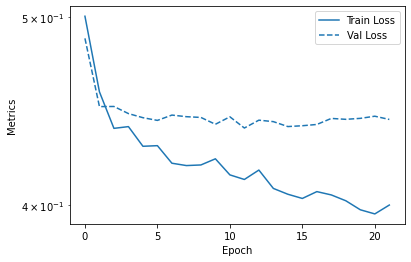

In [119]:
plot_metric(history, ['Loss',], 0,['loss',])

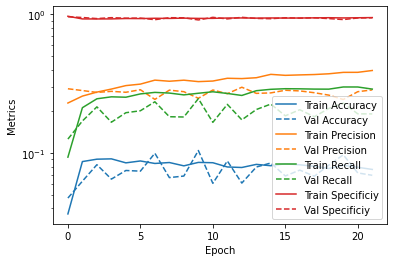

In [120]:
plot_metric(history, ['Accuracy', 'Precision','Recall', 'Specificiy'], 0,['masked_accuracy', 'masked_precision','masked_recall', 'masked_specificity'])

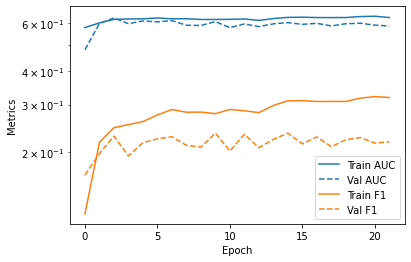

In [121]:
plot_metric(history, ['AUC', 'F1'], 0,['masked_AUC', 'masked_f1'])

Tranformer

In [125]:
accuracyresultlist=[]
precisionresultlist=[]
recallresultlist=[]
specificity=[]
auclist=[]
flist=[]

accuracyresultlist_CT=[]
precisionresultlist_CT=[]
recallresultlist_CT=[]
specificity_CT=[]
flist_CT=[]

accuracyresultlist_T=[]
precisionresultlist_T=[]
recallresultlist_T=[]
specificity_T=[]
flist_T=[]

for train_index, validate_index in kfold.split(train_feature_df, train_label_df[antibitics_abx_list]):
    X=train_feature_df
    Y=train_label_df[antibitics_abx_list]
    x_train_tfidf = X.iloc[train_index]
    y_train_tfidf = Y.iloc[train_index]
    x_val_tfidf = X.iloc[validate_index]
    y_val_tfidf = Y.iloc[validate_index]
    x_train_tfidf=x_train_tfidf.reset_index(drop=True)
    y_train_tfidf=y_train_tfidf.reset_index(drop=True)
    x_val_tfidf=x_val_tfidf.reset_index(drop=True)
    y_val_tfidf=y_val_tfidf.reset_index(drop=True)
    sample_size = x_train_tfidf.values.shape[0] # number of samples in train set
    time_steps  = x_train_tfidf.values.shape[1] # number of features in train set
    input_dimension = 1               # each feature is represented by 1 number
    train_data_reshaped = x_train_tfidf.values.reshape(sample_size,time_steps,input_dimension)
    #x_test_tfidf = (x_test_tfidf.values)
    #y_test_tfidf=(y_test_tfidf.values)
    sample_size = x_val_tfidf.values.shape[0] # number of samples in train set
    time_steps  = x_val_tfidf.values.shape[1] # number of features in train set

    x_val_reshaped = x_val_tfidf.values.reshape(sample_size,time_steps,input_dimension)

    x_test_tfidf=test_feature_df.reset_index(drop=True)
    y_test_tfidf =test_label_df[antibitics_abx_list].reset_index(drop=True)
    sample_size = x_test_tfidf.values.shape[0] # number of samples in train set
    time_steps  = x_test_tfidf.values.shape[1] # number of features in train set
    test_data_reshaped =x_test_tfidf.values.reshape(sample_size,time_steps,input_dimension)

    #model = Tran_Model(train_data_reshaped)
    model=Tran_Model(train_data_reshaped)
    model.compile(loss=masked_f1_loss,
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                metrics=METRICS)
    
    history = model.fit(train_data_reshaped, y_train_tfidf, epochs=EPOCHS,validation_data=(x_val_reshaped, y_val_tfidf), callbacks=[es], verbose=1)
    results = model.evaluate(test_data_reshaped, y_test_tfidf, verbose=0)
    print(results)
    if (results[6] > best_result):
        model.save('output/Best_Model_F1_Transformer')
        best_result=results[6]
    accuracyresultlist.append(results[1])
    precisionresultlist.append(results[2])
    recallresultlist.append(results[3])
    specificity.append(results[4])
    auclist.append(results[6])
    flist.append(results[5])
    
    ypredict = model.predict(test_data_reshaped)
    mask = K.cast(K.not_equal(y_test_tfidf, mask_value), K.floatx())
    mask_np=mask.numpy()
    Threshold_list=[0.5,0.5,0.5,0.5]
    for i in range(4):
        fpr, tpr, thres = roc_curve((y_test_tfidf.values*mask_np)[:, i], (ypredict*mask_np)[:, i])#test
        gmeans = sqrt(tpr * (1-fpr))
        ix = argmax(gmeans)
        Threshold_list[i]=thres[ix]
    
    accuracyresultlist_CT.append(masked_accuracy(y_test_tfidf,ypredict, model_threshold=np.mean(Threshold_list)).numpy())
    precisionresultlist_CT.append(masked_precision(y_test_tfidf.values,ypredict, model_threshold=np.mean(Threshold_list)).numpy())
    recallresultlist_CT.append(masked_recall(y_test_tfidf.values,ypredict, model_threshold=np.mean(Threshold_list)).numpy())
    specificity_CT.append(masked_specificity(y_test_tfidf.values,ypredict, model_threshold=np.mean(Threshold_list)).numpy())
    flist_CT.append(masked_f1(y_test_tfidf.values,ypredict, model_threshold=np.mean(Threshold_list)).numpy())

    accuracyresultlist_T.append(masked_accuracy(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())
    precisionresultlist_T.append(masked_precision(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())
    recallresultlist_T.append(masked_recall(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())
    specificity_T.append(masked_specificity(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())
    flist_T.append(masked_f1(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())


print(np.mean(accuracyresultlist),np.std(accuracyresultlist), np.mean(precisionresultlist),np.std(precisionresultlist), np.mean(recallresultlist), np.std(recallresultlist), np.mean(specificity), np.std(specificity), np.mean(auclist), np.std(auclist), np.mean(flist), np.std(flist))
print(np.mean(accuracyresultlist_CT),np.std(accuracyresultlist_CT), np.mean(precisionresultlist_CT),np.std(precisionresultlist_CT), np.mean(recallresultlist_CT), np.std(recallresultlist_CT), np.mean(specificity_CT), np.std(specificity_CT), np.mean(flist_CT), np.std(flist_CT))
print(np.mean(accuracyresultlist_T),np.std(accuracyresultlist_T), np.mean(precisionresultlist_T),np.std(precisionresultlist_T), np.mean(recallresultlist_T), np.std(recallresultlist_T), np.mean(specificity_T), np.std(specificity_T), np.mean(flist_T), np.std(flist_T))


transformer_encoder (None, 788, 1)
Epoch 1/100


C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


248/248 [==============================] - ETA: 0s - loss: 0.8230 - masked_accuracy: 0.9530 - masked_precision: 0.1050 - masked_recall: 0.9604 - masked_specificity: 0.0477 - masked_f1: 0.1876 - masked_AUC: 0.5077

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


248/248 [==============================] - 697s 3s/step - loss: 0.8230 - masked_accuracy: 0.9530 - masked_precision: 0.1050 - masked_recall: 0.9604 - masked_specificity: 0.0477 - masked_f1: 0.1876 - masked_AUC: 0.5077 - val_loss: 0.8247 - val_masked_accuracy: 1.0000 - val_masked_precision: 0.1016 - val_masked_recall: 1.0000 - val_masked_specificity: 0.0000e+00 - val_masked_f1: 0.1827 - val_masked_AUC: 0.5000
Epoch 2/100
248/248 [==============================] - 688s 3s/step - loss: 0.8207 - masked_accuracy: 0.9916 - masked_precision: 0.1033 - masked_recall: 0.9883 - masked_specificity: 0.0080 - masked_f1: 0.1855 - masked_AUC: 0.4967 - val_loss: 0.8247 - val_masked_accuracy: 1.0000 - val_masked_precision: 0.1016 - val_masked_recall: 1.0000 - val_masked_specificity: 0.0000e+00 - val_masked_f1: 0.1827 - val_masked_AUC: 0.5000
Epoch 3/100
248/248 [==============================] - 683s 3s/step - loss: 0.8210 - masked_accuracy: 0.9880 - masked_precision: 0.1039 - masked_recall: 0.9898 - ma

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


[0.8123992681503296, 1.0, 0.10814012587070465, 1.0, 0.0, 0.19360965490341187, 0.5]
transformer_encoder (None, 788, 1)
Epoch 1/100


C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


248/248 [==============================] - ETA: 0s - loss: 0.8266 - masked_accuracy: 0.8391 - masked_precision: 0.1099 - masked_recall: 0.8895 - masked_specificity: 0.1658 - masked_f1: 0.1928 - masked_AUC: 0.5501

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


248/248 [==============================] - 709s 3s/step - loss: 0.8266 - masked_accuracy: 0.8391 - masked_precision: 0.1099 - masked_recall: 0.8895 - masked_specificity: 0.1658 - masked_f1: 0.1928 - masked_AUC: 0.5501 - val_loss: 0.8223 - val_masked_accuracy: 1.0000 - val_masked_precision: 0.1033 - val_masked_recall: 1.0000 - val_masked_specificity: 0.0000e+00 - val_masked_f1: 0.1856 - val_masked_AUC: 0.5000
Epoch 2/100
248/248 [==============================] - 691s 3s/step - loss: 0.8213 - masked_accuracy: 0.9372 - masked_precision: 0.1060 - masked_recall: 0.9678 - masked_specificity: 0.0660 - masked_f1: 0.1894 - masked_AUC: 0.5359 - val_loss: 0.8224 - val_masked_accuracy: 1.0000 - val_masked_precision: 0.1033 - val_masked_recall: 1.0000 - val_masked_specificity: 0.0000e+00 - val_masked_f1: 0.1856 - val_masked_AUC: 0.5673
Epoch 3/100
248/248 [==============================] - 691s 3s/step - loss: 0.8209 - masked_accuracy: 0.9088 - masked_precision: 0.1085 - masked_recall: 0.9562 - ma

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


[0.8123994469642639, 1.0, 0.10814012587070465, 1.0, 0.0, 0.19360965490341187, 0.5]
transformer_encoder (None, 788, 1)
Epoch 1/100


C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


248/248 [==============================] - ETA: 0s - loss: 0.8301 - masked_accuracy: 0.7318 - masked_precision: 0.1112 - masked_recall: 0.7993 - masked_specificity: 0.2760 - masked_f1: 0.1923 - masked_AUC: 0.5719

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


248/248 [==============================] - 707s 3s/step - loss: 0.8301 - masked_accuracy: 0.7318 - masked_precision: 0.1112 - masked_recall: 0.7993 - masked_specificity: 0.2760 - masked_f1: 0.1923 - masked_AUC: 0.5719 - val_loss: 0.8219 - val_masked_accuracy: 0.9608 - val_masked_precision: 0.1042 - val_masked_recall: 0.9574 - val_masked_specificity: 0.0389 - val_masked_f1: 0.1863 - val_masked_AUC: 0.4767
Epoch 2/100
248/248 [==============================] - 707s 3s/step - loss: 0.8242 - masked_accuracy: 0.9013 - masked_precision: 0.1059 - masked_recall: 0.9327 - masked_specificity: 0.1027 - masked_f1: 0.1886 - masked_AUC: 0.5383 - val_loss: 0.8188 - val_masked_accuracy: 1.0000 - val_masked_precision: 0.1045 - val_masked_recall: 1.0000 - val_masked_specificity: 0.0000e+00 - val_masked_f1: 0.1876 - val_masked_AUC: 0.5801
Epoch 3/100
248/248 [==============================] - 709s 3s/step - loss: 0.8251 - masked_accuracy: 0.9150 - masked_precision: 0.1062 - masked_recall: 0.9533 - masked

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


[0.8123934268951416, 1.0, 0.10814012587070465, 1.0, 0.0, 0.19360965490341187, 0.5649504661560059]
1.0 0.0 0.10814012587070465 0.0 1.0 0.0 0.0 0.0 0.5216501553853353 0.030617943373426066 0.19360965490341187 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.114416815 0.089691654 0.050215792 0.03555712 0.3642588 0.2580283 0.0 0.0 0.08822418 0.062431447


In [127]:
print(np.mean(accuracyresultlist),np.std(accuracyresultlist), np.mean(precisionresultlist),np.std(precisionresultlist), np.mean(recallresultlist), np.std(recallresultlist), np.mean(specificity), np.std(specificity), np.mean(auclist), np.std(auclist), np.mean(flist), np.std(flist))
print(np.mean(accuracyresultlist_CT),np.std(accuracyresultlist_CT), np.mean(precisionresultlist_CT),np.std(precisionresultlist_CT), np.mean(recallresultlist_CT), np.std(recallresultlist_CT), np.mean(specificity_CT), np.std(specificity_CT), np.mean(flist_CT), np.std(flist_CT))
print(np.mean(accuracyresultlist_T),np.std(accuracyresultlist_T), np.mean(precisionresultlist_T),np.std(precisionresultlist_T), np.mean(recallresultlist_T), np.std(recallresultlist_T), np.mean(specificity_T), np.std(specificity_T), np.mean(flist_T), np.std(flist_T))


1.0 0.0 0.10814012587070465 0.0 1.0 0.0 0.0 0.0 0.5216501553853353 0.030617943373426066 0.19360965490341187 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.114416815 0.089691654 0.050215792 0.03555712 0.3642588 0.2580283 0.0 0.0 0.08822418 0.062431447


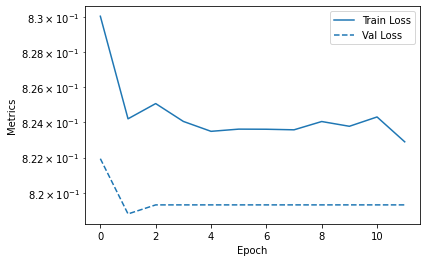

In [128]:
plot_metric(history, ['Loss',], 0,['loss',])

In [173]:
accuracyresultlist=[]
precisionresultlist=[]
recallresultlist=[]
specificity=[]
auclist=[]
flist=[]

accuracyresultlist_CT=[]
precisionresultlist_CT=[]
recallresultlist_CT=[]
specificity_CT=[]
flist_CT=[]

accuracyresultlist_T=[]
precisionresultlist_T=[]
recallresultlist_T=[]
specificity_T=[]
flist_T=[]

for train_index, validate_index in kfold.split(train_feature_df, train_label_df[antibitics_abx_list]):
    X=train_feature_df
    Y=train_label_df[antibitics_abx_list]
    x_train_tfidf = X.iloc[train_index]
    y_train_tfidf = Y.iloc[train_index]
    x_val_tfidf = X.iloc[validate_index]
    y_val_tfidf = Y.iloc[validate_index]
    x_train_tfidf=x_train_tfidf.reset_index(drop=True)
    y_train_tfidf=y_train_tfidf.reset_index(drop=True)
    x_val_tfidf=x_val_tfidf.reset_index(drop=True)
    y_val_tfidf=y_val_tfidf.reset_index(drop=True)
    sample_size = x_train_tfidf.values.shape[0] # number of samples in train set
    time_steps  = x_train_tfidf.values.shape[1] # number of features in train set
    input_dimension = 1               # each feature is represented by 1 number
    train_data_reshaped = x_train_tfidf.values.reshape(sample_size,time_steps,input_dimension)
    #x_test_tfidf = (x_test_tfidf.values)
    #y_test_tfidf=(y_test_tfidf.values)
    sample_size = x_val_tfidf.values.shape[0] # number of samples in train set
    time_steps  = x_val_tfidf.values.shape[1] # number of features in train set

    x_val_reshaped = x_val_tfidf.values.reshape(sample_size,time_steps,input_dimension)

    x_test_tfidf=test_feature_df.reset_index(drop=True)
    y_test_tfidf =test_label_df[antibitics_abx_list].reset_index(drop=True)
    sample_size = x_test_tfidf.values.shape[0] # number of samples in train set
    time_steps  = x_test_tfidf.values.shape[1] # number of features in train set
    test_data_reshaped =x_test_tfidf.values.reshape(sample_size,time_steps,input_dimension)

    #model = Tran_Model(train_data_reshaped)
    model=build_conv1D_model(train_data_reshaped)
    model.compile(loss=masked_f1_loss,
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                metrics=METRICS)
    
    history = model.fit(train_data_reshaped, y_train_tfidf, epochs=EPOCHS,validation_data=(x_val_reshaped, y_val_tfidf), callbacks=[es], verbose=1)
    results = model.evaluate(test_data_reshaped, y_test_tfidf, verbose=0)
    print(results)
    if (results[6] > best_result):
        model.save('output/Best_Model_F1_IDCNN_fulltrain')
        best_result=results[6]
    accuracyresultlist.append(results[1])
    precisionresultlist.append(results[2])
    recallresultlist.append(results[3])
    specificity.append(results[4])
    auclist.append(results[6])
    flist.append(results[5])
    
    ypredict = model.predict(test_data_reshaped)
    mask = K.cast(K.not_equal(y_test_tfidf, mask_value), K.floatx())
    mask_np=mask.numpy()
    Threshold_list=[0.5,0.5,0.5,0.5]
    for i in range(4):
        fpr, tpr, thres = roc_curve((y_test_tfidf.values*mask_np)[:, i], (ypredict*mask_np)[:, i])#test
        gmeans = sqrt(tpr * (1-fpr))
        ix = argmax(gmeans)
        Threshold_list[i]=thres[ix]
    
    accuracyresultlist_CT.append(masked_accuracy(y_test_tfidf,ypredict, model_threshold=np.mean(Threshold_list)).numpy())
    precisionresultlist_CT.append(masked_precision(y_test_tfidf.values,ypredict, model_threshold=np.mean(Threshold_list)).numpy())
    recallresultlist_CT.append(masked_recall(y_test_tfidf.values,ypredict, model_threshold=np.mean(Threshold_list)).numpy())
    specificity_CT.append(masked_specificity(y_test_tfidf.values,ypredict, model_threshold=np.mean(Threshold_list)).numpy())
    flist_CT.append(masked_f1(y_test_tfidf.values,ypredict, model_threshold=np.mean(Threshold_list)).numpy())

    accuracyresultlist_T.append(masked_accuracy(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())
    precisionresultlist_T.append(masked_precision(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())
    recallresultlist_T.append(masked_recall(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())
    specificity_T.append(masked_specificity(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())
    flist_T.append(masked_f1(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())


print(np.mean(accuracyresultlist),np.std(accuracyresultlist), np.mean(precisionresultlist),np.std(precisionresultlist), np.mean(recallresultlist), np.std(recallresultlist), np.mean(specificity), np.std(specificity), np.mean(auclist), np.std(auclist), np.mean(flist), np.std(flist))
print(np.mean(accuracyresultlist_CT),np.std(accuracyresultlist_CT), np.mean(precisionresultlist_CT),np.std(precisionresultlist_CT), np.mean(recallresultlist_CT), np.std(recallresultlist_CT), np.mean(specificity_CT), np.std(specificity_CT), np.mean(flist_CT), np.std(flist_CT))
print(np.mean(accuracyresultlist_T),np.std(accuracyresultlist_T), np.mean(precisionresultlist_T),np.std(precisionresultlist_T), np.mean(recallresultlist_T), np.std(recallresultlist_T), np.mean(specificity_T), np.std(specificity_T), np.mean(flist_T), np.std(flist_T))


C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/100
1687/1687 [==============================] - ETA: 0s - loss: 0.5400 - masked_accuracy: 0.5485 - masked_precision: 0.3250 - masked_recall: 0.7329 - masked_specificity: 0.5652 - masked_f1: 0.4449 - masked_AUC: 0.6785   ETA: 1:44 - loss: 0.5598 -  - ETA: 1:02 - loss: 0.5450 - masked - ETA: 53s - loss: 0.5437 - masked_accuracy: 0.5562 - masked_precision: 0.3228 - masked_recall: 0.7350 - masked_specificity:  - ETA: 49s - loss: 0.5445 - masked_accuracy: 0.5537 - mask - ETA: 40s - loss: 0.5428 - masked_accuracy: 0.5539 - masked_precision: 0.3231 - masked_recall: 0.7348 - masked_specificity: 0.5594 - masked_f - ETA: 37s - loss: 0.5426 - masked_accuracy: 0.5536 - masked_precision: 0.3233 - masked_recall: 0.7347 - masked_specificity: 0.5597 - masked_f1: 0.4432 - masked_AUC: - ETA: 36s - loss: 0.5428 - masked_accuracy: 0.5534 - masked_precision: 0.3231 - masked_recall: 0.7346 - masked_specificity: 0.5599 - masked_f1: 0.4430 - masked_AUC: 0.6 - ETA: 36s - loss: 0.5426 - masked_accuracy

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1687/1687 [==============================] - 171s 102ms/step - loss: 0.5400 - masked_accuracy: 0.5485 - masked_precision: 0.3250 - masked_recall: 0.7329 - masked_specificity: 0.5652 - masked_f1: 0.4449 - masked_AUC: 0.6785 - val_loss: 0.5266 - val_masked_accuracy: 0.4943 - val_masked_precision: 0.3406 - val_masked_recall: 0.6946 - val_masked_specificity: 0.6224 - val_masked_f1: 0.4532 - val_masked_AUC: 0.6832
Epoch 2/100
1687/1687 [==============================] - 175s 104ms/step - loss: 0.5220 - masked_accuracy: 0.5282 - masked_precision: 0.3370 - masked_recall: 0.7342 - masked_specificity: 0.5912 - masked_f1: 0.4570 - masked_AUC: 0.6868 - val_loss: 0.5187 - val_masked_accuracy: 0.5386 - val_masked_precision: 0.3366 - val_masked_recall: 0.7499 - val_masked_specificity: 0.5841 - val_masked_f1: 0.4608 - val_masked_AUC: 0.6923on: 0.3335 - - ETA: 2:08 - loss: 0.5264 - masked_accuracy: 0.5217 - masked_precision: 0.3402 - masked_re - ETA: 2:05 - loss: 0.5249 - masked_a - ETA: 1:59 - loss: 

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


[0.806150496006012, 0.2777217626571655, 0.2081671506166458, 0.5431232452392578, 0.7536754608154297, 0.29534536600112915, 0.6489092707633972]
Epoch 1/100
   1/1687 [..............................] - ETA: 3:23 - loss: 0.6737 - masked_accuracy: 0.4583 - masked_precision: 0.3462 - masked_recall: 0.6207 - masked_specificity: 0.6264 - masked_f1: 0.4444 - masked_AUC: 0.6334

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1687/1687 [==============================] - ETA: 0s - loss: 0.5438 - masked_accuracy: 0.5592 - masked_precision: 0.3214 - masked_recall: 0.7375 - masked_specificity: 0.5538 - masked_f1: 0.4420 - masked_AUC: 0.6779   ETA: 2:33 - loss: 0.6423 - masked_accurac - ETA: 1:06 - loss: 0.5505 - masked_accuracy: 0.5729 - masked_precision: 0.3149 - masked_recall: 0.7433 - masked_specif - ETA: 1:04 - loss: 0.5499 - masked_accur - ETA: 41s - loss: 0.5472 - masked_accuracy: 0.5659 - masked_precision: 0.3185 - masked_re - ETA: 33s - loss: 0.5464 - masked_accuracy: 0.5647 - masked_precision: 0.3191 - masked_recall: 0.7387 - masked_specificity: 0.5476 - masked_f1 - ETA: 30s - loss: 0.5459 - masked_accuracy: 0.5636 - masked_precision: 0.3194 - masked_recall: 0.7383 - masked_sp - ETA: 25s - loss: 0.5449 - masked_accuracy: 0.5628 - masked_precision: 0.3202 - masked_recall: 0.7387 - masked_specificity: 0.549 - ETA: 21s - loss: 0.5445 - masked_accuracy: 0.5613 - masked_precision: 0.3207 - masked_recall: 0.

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1687/1687 [==============================] - 182s 108ms/step - loss: 0.5438 - masked_accuracy: 0.5592 - masked_precision: 0.3214 - masked_recall: 0.7375 - masked_specificity: 0.5538 - masked_f1: 0.4420 - masked_AUC: 0.6779 - val_loss: 0.5257 - val_masked_accuracy: 0.5428 - val_masked_precision: 0.3331 - val_masked_recall: 0.7505 - val_masked_specificity: 0.5780 - val_masked_f1: 0.4571 - val_masked_AUC: 0.6898
Epoch 2/100
1687/1687 [==============================] - 183s 108ms/step - loss: 0.5286 - masked_accuracy: 0.5294 - masked_precision: 0.3336 - masked_recall: 0.7278 - masked_specificity: 0.5881 - masked_f1: 0.4531 - masked_AUC: 0.6791 - val_loss: 0.5204 - val_masked_accuracy: 0.5218 - val_masked_precision: 0.3388 - val_masked_recall: 0.7325 - val_masked_specificity: 0.5986 - val_masked_f1: 0.4589 - val_masked_AUC: 0.6860masked_recall: 0.7301 - masked_specificity: 0.5843 - mas - ETA: 42s - loss: 0.5301 - masked_accuracy: 0.5336 - masked_precision: 0.3330 - masked_recall: 0.7294 - m

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


[0.8115866184234619, 0.09192288666963577, 0.27638155221939087, 0.22897127270698547, 0.9257276058197021, 0.23996388912200928, 0.5804897546768188]
Epoch 1/100
   1/1687 [..............................] - ETA: 3:00 - loss: 0.6953 - masked_accuracy: 0.5948 - masked_precision: 0.2656 - masked_recall: 0.6296 - masked_specificity: 0.4719 - masked_f1: 0.3736 - masked_AUC: 0.6140

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1687/1687 [==============================] - ETA: 0s - loss: 0.5462 - masked_accuracy: 0.5803 - masked_precision: 0.3177 - masked_recall: 0.7615 - masked_specificity: 0.5327 - masked_f1: 0.4422 - masked_AUC: 0.6774   ETA: 2:15 - loss: 0.5737 - masked_accuracy: 0.6467 - masked_precision: 0.2936 - masked_recall: 0.7851 - - ETA: 1:05 - loss: 0.5549 - - ETA: 58s - loss: 0.5537 - masked_accuracy: 0.5984 - masked_precision: 0.3125 - masked_recall: 0.7702 - masked_specificity: 0.5128 - masked_f1: 0.4381 - mask - ETA: 56s - loss: 0.5536 - m - ETA: 42s - loss: 0.5508 - masked_accuracy: 0.5935 - masked_precision: 0.3149 - masked_recall: 0.7687 - masked_specificity: 0.5181 - masked_f1: 0.4405 -  - ETA: 41s - loss: 0.5505 - masked_accuracy: 0.5934 - masked_precision: 0.3148 - masked_recall: 0.7692 - masked_specificity: 0.5183 - masked_f1: 0.4405 - mas - ETA: 39s - loss: 0.5500 - masked_accuracy: 0.5929 - masked_precision: 0.3151 - masked_recall: 0.7690 - masked_specificity: 0.5189 - ma - ETA: 36s 

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1687/1687 [==============================] - 189s 112ms/step - loss: 0.5462 - masked_accuracy: 0.5803 - masked_precision: 0.3177 - masked_recall: 0.7615 - masked_specificity: 0.5327 - masked_f1: 0.4422 - masked_AUC: 0.6774 - val_loss: 0.5338 - val_masked_accuracy: 0.5142 - val_masked_precision: 0.3329 - val_masked_recall: 0.7039 - val_masked_specificity: 0.5996 - val_masked_f1: 0.4475 - val_masked_AUC: 0.6740
Epoch 2/100
1687/1687 [==============================] - 187s 111ms/step - loss: 0.5248 - masked_accuracy: 0.5296 - masked_precision: 0.3345 - masked_recall: 0.7337 - masked_specificity: 0.5887 - masked_f1: 0.4548 - masked_AUC: 0.6857 - val_loss: 0.5289 - val_masked_accuracy: 0.6007 - val_masked_precision: 0.3211 - val_masked_recall: 0.7970 - val_masked_specificity: 0.5199 - val_masked_f1: 0.4535 - val_masked_AUC: 0.6894all: 0 - ETA: 46s - loss: 0.5248 - masked_accuracy: 0.5357 - masked_precision: 0.3330 - masked_recall: 0.7408 - masked_specificity: 0.5823 - masked_f1: 0.4546 - ma

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


[0.8351722359657288, 0.07150957733392715, 0.28646788001060486, 0.18883904814720154, 0.9437145590782166, 0.21597059071063995, 0.5803106427192688]
0.14705140888690948 0.092772955165974 0.2570055276155472 0.034778573892489874 0.32031118869781494 0.15840151149783807 0.8743725419044495 0.08566104388591918 0.6032365560531616 0.03229556906682672 0.25042661527792615 0.03323843374834012
0.18764274 0.06382985 0.23268496 0.017379627 0.3921683 0.100067355 0.8432739 0.06370054 0.2852155 0.0106906155
0.32157657 0.0400764 0.13546856 0.016161235 0.48259115 0.0153450705 0.7415857 0.0016558762 0.21074305 0.018901648


In [179]:
train_feature_df.shape

(80962, 790)

In [174]:
print(np.mean(accuracyresultlist),np.std(accuracyresultlist), np.mean(precisionresultlist),np.std(precisionresultlist), np.mean(recallresultlist), np.std(recallresultlist), np.mean(specificity), np.std(specificity), np.mean(auclist), np.std(auclist), np.mean(flist), np.std(flist))
print(np.mean(accuracyresultlist_CT),np.std(accuracyresultlist_CT), np.mean(precisionresultlist_CT),np.std(precisionresultlist_CT), np.mean(recallresultlist_CT), np.std(recallresultlist_CT), np.mean(specificity_CT), np.std(specificity_CT), np.mean(flist_CT), np.std(flist_CT))
print(np.mean(accuracyresultlist_T),np.std(accuracyresultlist_T), np.mean(precisionresultlist_T),np.std(precisionresultlist_T), np.mean(recallresultlist_T), np.std(recallresultlist_T), np.mean(specificity_T), np.std(specificity_T), np.mean(flist_T), np.std(flist_T))


0.14705140888690948 0.092772955165974 0.2570055276155472 0.034778573892489874 0.32031118869781494 0.15840151149783807 0.8743725419044495 0.08566104388591918 0.6032365560531616 0.03229556906682672 0.25042661527792615 0.03323843374834012
0.18764274 0.06382985 0.23268496 0.017379627 0.3921683 0.100067355 0.8432739 0.06370054 0.2852155 0.0106906155
0.32157657 0.0400764 0.13546856 0.016161235 0.48259115 0.0153450705 0.7415857 0.0016558762 0.21074305 0.018901648


In [175]:
Threshold_list, np.mean(Threshold_list)

([1.9587471e-17, 3.1174732e-06, 4.9072667e-23, 1.943978e-25], 7.793683e-07)

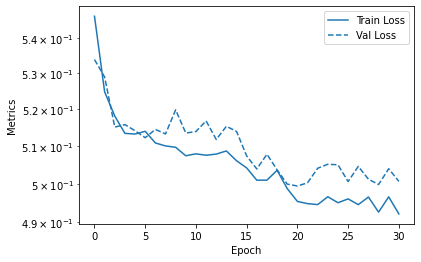

In [176]:
plot_metric(history, ['Loss',], 0,['loss',])

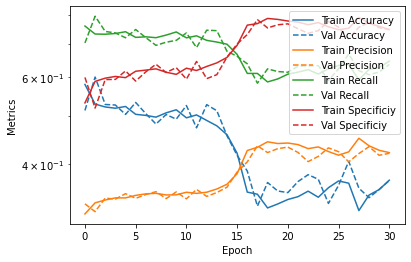

In [177]:
plot_metric(history, ['Accuracy', 'Precision','Recall', 'Specificiy'], 0,['masked_accuracy', 'masked_precision','masked_recall', 'masked_specificity'])

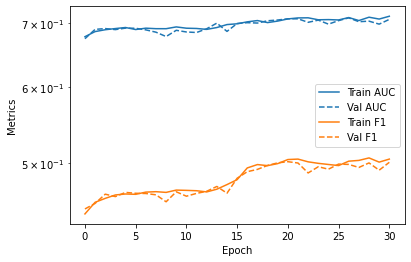

In [178]:
plot_metric(history, ['AUC', 'F1'], 0,['masked_AUC', 'masked_f1'])

In [230]:
import random, os, sys
from keras.models import *
from keras.layers import *
from keras.callbacks import *
from keras.initializers import *
import tensorflow as tf
#from keras.engine.topology import Layer

In [234]:
embed_size = 60
class LayerNormalization(Layer):
    def __init__(self, eps=1e-6, **kwargs):
        self.eps = eps
        super(LayerNormalization, self).__init__(**kwargs)
    def build(self, input_shape):
        self.gamma = self.add_weight(name='gamma', shape=input_shape[-1:],
                                     initializer=Ones(), trainable=True)
        self.beta = self.add_weight(name='beta', shape=input_shape[-1:],
                                    initializer=Zeros(), trainable=True)
        super(LayerNormalization, self).build(input_shape)
    def call(self, x):
        mean = K.mean(x, axis=-1, keepdims=True)
        std = K.std(x, axis=-1, keepdims=True)
        return self.gamma * (x - mean) / (std + self.eps) + self.beta
    def compute_output_shape(self, input_shape):
        return input_shape
class ScaledDotProductAttention():
    def __init__(self, d_model, attn_dropout=0.1):
        self.temper = np.sqrt(d_model)
        self.dropout = Dropout(attn_dropout)
    def __call__(self, q, k, v, mask):
        attn = Lambda(lambda x:K.batch_dot(x[0],x[1],axes=[2,2])/self.temper)([q, k])
        if mask is not None:
            mmask = Lambda(lambda x:(-1e+10)*(1-x))(mask)
            attn = Add()([attn, mmask])
        attn = Activation('softmax')(attn)
        attn = self.dropout(attn)
        output = Lambda(lambda x:K.batch_dot(x[0], x[1]))([attn, v])
        return output, attn

class MultiHeadAttention_2():
    # mode 0 - big martixes, faster; mode 1 - more clear implementation
    def __init__(self, n_head, d_model, d_k, d_v, dropout, mode=0, use_norm=True):
        self.mode = mode
        self.n_head = n_head
        self.d_k = d_k
        self.d_v = d_v
        self.dropout = dropout
        if mode == 0:
            self.qs_layer = Dense(n_head*d_k, use_bias=False)
            self.ks_layer = Dense(n_head*d_k, use_bias=False)
            self.vs_layer = Dense(n_head*d_v, use_bias=False)
        elif mode == 1:
            self.qs_layers = []
            self.ks_layers = []
            self.vs_layers = []
            for _ in range(n_head):
                self.qs_layers.append(TimeDistributed(Dense(d_k, use_bias=False)))
                self.ks_layers.append(TimeDistributed(Dense(d_k, use_bias=False)))
                self.vs_layers.append(TimeDistributed(Dense(d_v, use_bias=False)))
        self.attention = ScaledDotProductAttention(d_model)
        self.layer_norm = LayerNormalization() if use_norm else None
        self.w_o = TimeDistributed(Dense(d_model))
    
    def __call__(self, q, k, v, mask=None):
        d_k, d_v = self.d_k, self.d_v
        n_head = self.n_head

        if self.mode == 0:
            qs = self.qs_layer(q)  # [batch_size, len_q, n_head*d_k]
            ks = self.ks_layer(k)
            vs = self.vs_layer(v)

            def reshape1(x):
                s = tf.shape(x)   # [batch_size, len_q, n_head * d_k]
                x = tf.reshape(x, [s[0], s[1], n_head, d_k])
                x = tf.transpose(x, [2, 0, 1, 3])  
                x = tf.reshape(x, [-1, s[1], d_k])  # [n_head * batch_size, len_q, d_k]
                return x
            qs = Lambda(reshape1)(qs)
            ks = Lambda(reshape1)(ks)
            vs = Lambda(reshape1)(vs)
            if mask is not None:
                mask = Lambda(lambda x:K.repeat_elements(x, n_head, 0))(mask)
            head, attn = self.attention(qs, ks, vs, mask=mask)  
                
            def reshape2(x):
                s = tf.shape(x)   # [n_head * batch_size, len_v, d_v]
                x = tf.reshape(x, [n_head, -1, s[1], s[2]]) 
                x = tf.transpose(x, [1, 2, 0, 3])
                x = tf.reshape(x, [-1, s[1], n_head*d_v])  # [batch_size, len_v, n_head * d_v]
                return x
            head = Lambda(reshape2)(head)
        elif self.mode == 1:
            heads = []; attns = []
            for i in range(n_head):
                qs = self.qs_layers[i](q)   
                ks = self.ks_layers[i](k) 
                vs = self.vs_layers[i](v) 
                head, attn = self.attention(qs, ks, vs, mask)
                heads.append(head); attns.append(attn)
            head = Concatenate()(heads) if n_head > 1 else heads[0]
            attn = Concatenate()(attns) if n_head > 1 else attns[0]

        outputs = self.w_o(head)
        outputs = Dropout(self.dropout)(outputs)
        if not self.layer_norm: return outputs, attn
        # outputs = Add()([outputs, q]) # sl: fix
        return self.layer_norm(outputs), attn
class PositionwiseFeedForward():
    def __init__(self, d_hid, d_inner_hid, dropout=0.1):
        self.w_1 = Conv1D(d_inner_hid, 1, activation='relu')
        self.w_2 = Conv1D(d_hid, 1)
        self.layer_norm = LayerNormalization()
        self.dropout = Dropout(dropout)
    def __call__(self, x):
        output = self.w_1(x) 
        output = self.w_2(output)
        output = self.dropout(output)
        output = Add()([output, x])
        return self.layer_norm(output)

class EncoderLayer():
    def __init__(self, d_model, d_inner_hid, n_head, d_k, d_v, dropout=0.1):
        self.self_att_layer = MultiHeadAttention(n_head, d_model, d_k, d_v, dropout=dropout)
        self.pos_ffn_layer  = PositionwiseFeedForward(d_model, d_inner_hid, dropout=dropout)
    def __call__(self, enc_input, mask=None):
        output, slf_attn = self.self_att_layer(enc_input, enc_input, enc_input, mask=mask)
        output = self.pos_ffn_layer(output)
        return output, slf_attn
    

    def GetPosEncodingMatrix(max_len, d_emb):
        pos_enc = np.array([
            [pos / np.power(10000, 2 * (j // 2) / d_emb) for j in range(d_emb)] 
            if pos != 0 else np.zeros(d_emb) 
                for pos in range(max_len)
                ])
        pos_enc[1:, 0::2] = np.sin(pos_enc[1:, 0::2]) # dim 2i
        pos_enc[1:, 1::2] = np.cos(pos_enc[1:, 1::2]) # dim 2i+1
        return pos_enc

    def GetPadMask(q, k):
        ones = K.expand_dims(K.ones_like(q, 'float32'), -1)
        mask = K.cast(K.expand_dims(K.not_equal(k, 0), 1), 'float32')
        mask = K.batch_dot(ones, mask, axes=[2,1])
        return mask

    def GetSubMask(s):
        len_s = tf.shape(s)[1]
        bs = tf.shape(s)[:1]
        mask = K.cumsum(tf.eye(len_s, batch_shape=bs), 1)
        return mask
    

In [236]:
def CnnTransformerModel(n_timesteps,n_features):


    i = Input(shape =(n_timesteps,n_features))
    
    #x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)(i)

    #x = Convolution1D( 8, kernel_size = 10, strides = 1, activation='relu')(x)
    
    #x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)(x)

    x = Convolution1D(16, kernel_size = 10, strides = 1, activation='relu')(i)
    
    #x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)(x)
    #x = Convolution1D(32, kernel_size = 10, strides = 1, activation='relu')(x)
    
    x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)(x)

    x = Convolution1D(64, kernel_size = 10, strides = 1, activation='relu')(x)

    #x = Bidirectional(LSTM(128, return_sequences = True, return_state = False))(x)
    
    x = Bidirectional(LSTM(64, return_sequences = True, return_state = False))(x)
    
    x, slf_attn = MultiHeadAttention_2(n_head=3, d_model=100, d_k=32, d_v=32, dropout=0.3)(x, x, x)
    
    avg_pool = GlobalAveragePooling1D()(x)
    
    avg_pool = Dense(30,activation = 'relu')(avg_pool)
    
    y = Dense(4,activation = 'sigmoid')(avg_pool)

    return Model(inputs = [i], outputs = [y])

In [237]:
accuracyresultlist=[]
precisionresultlist=[]
recallresultlist=[]
specificity=[]
auclist=[]
flist=[]

accuracyresultlist_CT=[]
precisionresultlist_CT=[]
recallresultlist_CT=[]
specificity_CT=[]
flist_CT=[]

accuracyresultlist_T=[]
precisionresultlist_T=[]
recallresultlist_T=[]
specificity_T=[]
flist_T=[]

for train_index, validate_index in kfold.split(train_feature_df, train_label_df[antibitics_abx_list]):
    X=train_feature_df
    Y=train_label_df[antibitics_abx_list]
    x_train_tfidf = X.iloc[train_index]
    y_train_tfidf = Y.iloc[train_index]
    x_val_tfidf = X.iloc[validate_index]
    y_val_tfidf = Y.iloc[validate_index]
    x_train_tfidf=x_train_tfidf.reset_index(drop=True)
    y_train_tfidf=y_train_tfidf.reset_index(drop=True)
    x_val_tfidf=x_val_tfidf.reset_index(drop=True)
    y_val_tfidf=y_val_tfidf.reset_index(drop=True)
    sample_size = x_train_tfidf.values.shape[0] # number of samples in train set
    time_steps  = x_train_tfidf.values.shape[1] # number of features in train set
    input_dimension = 1               # each feature is represented by 1 number
    train_data_reshaped = x_train_tfidf.values.reshape(sample_size,time_steps,input_dimension)
    #x_test_tfidf = (x_test_tfidf.values)
    #y_test_tfidf=(y_test_tfidf.values)
    sample_size = x_val_tfidf.values.shape[0] # number of samples in train set
    time_steps  = x_val_tfidf.values.shape[1] # number of features in train set

    x_val_reshaped = x_val_tfidf.values.reshape(sample_size,time_steps,input_dimension)

    x_test_tfidf=test_feature_df.reset_index(drop=True)
    y_test_tfidf =test_label_df[antibitics_abx_list].reset_index(drop=True)
    sample_size = x_test_tfidf.values.shape[0] # number of samples in train set
    time_steps  = x_test_tfidf.values.shape[1] # number of features in train set
    test_data_reshaped =x_test_tfidf.values.reshape(sample_size,time_steps,input_dimension)

    #model = Tran_Model(train_data_reshaped)
    n_timesteps=time_steps
    n_features=input_dimension
    model=CnnTransformerModel(n_timesteps,n_features)
    model.compile(loss=masked_f1_loss,
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                metrics=METRICS)
    
    history = model.fit(train_data_reshaped, y_train_tfidf, epochs=EPOCHS,validation_data=(x_val_reshaped, y_val_tfidf), callbacks=[es], verbose=1)
    results = model.evaluate(test_data_reshaped, y_test_tfidf, verbose=0)
    print(results)
    if (results[6] > best_result):
        model.save('output/Best_Model_F1_Tran2')
        best_result=results[6]
    accuracyresultlist.append(results[1])
    precisionresultlist.append(results[2])
    recallresultlist.append(results[3])
    specificity.append(results[4])
    auclist.append(results[6])
    flist.append(results[5])
    
    ypredict = model.predict(test_data_reshaped)
    mask = K.cast(K.not_equal(y_test_tfidf, mask_value), K.floatx())
    mask_np=mask.numpy()
    Threshold_list=[0.5,0.5,0.5,0.5]
    for i in range(4):
        fpr, tpr, thres = roc_curve((y_test_tfidf.values*mask_np)[:, i], (ypredict*mask_np)[:, i])#test
        gmeans = sqrt(tpr * (1-fpr))
        ix = argmax(gmeans)
        Threshold_list[i]=thres[ix]
    
    accuracyresultlist_CT.append(masked_accuracy(y_test_tfidf,ypredict, model_threshold=np.mean(Threshold_list)).numpy())
    precisionresultlist_CT.append(masked_precision(y_test_tfidf.values,ypredict, model_threshold=np.mean(Threshold_list)).numpy())
    recallresultlist_CT.append(masked_recall(y_test_tfidf.values,ypredict, model_threshold=np.mean(Threshold_list)).numpy())
    specificity_CT.append(masked_specificity(y_test_tfidf.values,ypredict, model_threshold=np.mean(Threshold_list)).numpy())
    flist_CT.append(masked_f1(y_test_tfidf.values,ypredict, model_threshold=np.mean(Threshold_list)).numpy())

    accuracyresultlist_T.append(masked_accuracy(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())
    precisionresultlist_T.append(masked_precision(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())
    recallresultlist_T.append(masked_recall(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())
    specificity_T.append(masked_specificity(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())
    flist_T.append(masked_f1(y_test_tfidf.values,ypredict, model_threshold=Threshold_list).numpy())


print(np.mean(accuracyresultlist),np.std(accuracyresultlist), np.mean(precisionresultlist),np.std(precisionresultlist), np.mean(recallresultlist), np.std(recallresultlist), np.mean(specificity), np.std(specificity), np.mean(auclist), np.std(auclist), np.mean(flist), np.std(flist))
print(np.mean(accuracyresultlist_CT),np.std(accuracyresultlist_CT), np.mean(precisionresultlist_CT),np.std(precisionresultlist_CT), np.mean(recallresultlist_CT), np.std(recallresultlist_CT), np.mean(specificity_CT), np.std(specificity_CT), np.mean(flist_CT), np.std(flist_CT))
print(np.mean(accuracyresultlist_T),np.std(accuracyresultlist_T), np.mean(precisionresultlist_T),np.std(precisionresultlist_T), np.mean(recallresultlist_T), np.std(recallresultlist_T), np.mean(specificity_T), np.std(specificity_T), np.mean(flist_T), np.std(flist_T))


ValueError: Could not interpret optimizer identifier: <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x000001BADE7B5808>

In [180]:
custom_objects = {'masked_AUC': masked_AUC, 'masked_accuracy':masked_accuracy,
      'masked_precision':masked_precision,
      'masked_recall':masked_recall,
      'masked_f1':masked_f1,
      'masked_Specificity':masked_specificity,
      'masked_f1_loss':masked_f1_loss}
model2 = tf.keras.models.load_model('output/Best_Model_F1_IDCNN_fulltrain', custom_objects=custom_objects)

OSError: SavedModel file does not exist at: output/Best_Model_F1_IDCNN_fulltrain\{saved_model.pbtxt|saved_model.pb}

In [181]:
x_test_tfidf=test_feature_df.reset_index(drop=True)
y_test_tfidf =test_label_df[antibitics_abx_list].reset_index(drop=True)
sample_size = x_test_tfidf.values.shape[0] # number of samples in train set
time_steps  = x_test_tfidf.values.shape[1] # number of features in train set
test_data_reshaped =x_test_tfidf.values.reshape(sample_size,time_steps,input_dimension)
model.compile(loss=masked_loss_function,
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                metrics=METRICS)
model.evaluate(test_data_reshaped, y_test_tfidf, verbose=0)

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


[1.713951587677002,
 0.07150957733392715,
 0.28646788001060486,
 0.18883904814720154,
 0.9437145590782166,
 0.21597059071063995,
 0.5803106427192688]

In [ ]:
corr = feature_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

In [ ]:
s = corr.unstack()
so = s.sort_values(kind="quicksort")

In [ ]:
import seaborn as sns
kot = corr[corr>=.9]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

In [183]:
def get_gradients(img_input, top_pred_idx):
    """Computes the gradients of outputs w.r.t input image.

    Args:
        img_input: 4D image tensor
        top_pred_idx: Predicted label for the input image

    Returns:
        Gradients of the predictions w.r.t img_input
    """
    #print(img_input.shape)
    images = tf.cast(img_input, tf.float32)
    #print(images.shape)
    with tf.GradientTape() as tape:
        tape.watch(images)
        preds = model(images)
        #print (preds)
        top_class = preds[:, top_pred_idx]
        #print (top_class)


    grads = tape.gradient(top_class, images)
    return grads

In [184]:
def get_integrated_gradients(img_input, top_pred_idx, baseline=None, num_steps=50):
    """Computes Integrated Gradients for a predicted label.

    Args:
        img_input (ndarray): Original image
        top_pred_idx: Predicted label for the input image
        baseline (ndarray): The baseline image to start with for interpolation
        num_steps: Number of interpolation steps between the baseline
            and the input used in the computation of integrated gradients. These
            steps along determine the integral approximation error. By default,
            num_steps is set to 50.

    Returns:
        Integrated gradients w.r.t input image
    """
    # If baseline is not provided, start with a black image
    # having same size as the input image.
    if baseline is None:
        baseline = np.zeros(img_input.shape).astype(np.float32)
    else:
        baseline = baseline.astype(np.float32)

    # 1. Do interpolation.
    #print(img_input.shape)
    #print(baseline.shape)
    #print((img_input - baseline))
    img_input = img_input.astype(np.float32)
    interpolated_image = [
        baseline + (step / num_steps) * (img_input - baseline)
        for step in range(num_steps + 1)
    ]
    interpolated_image = np.array(interpolated_image).astype(np.float32)

    # 2. Preprocess the interpolated images
    #interpolated_image = xception.preprocess_input(interpolated_image)

    # 3. Get the gradients
    grads = []
    for i, img in enumerate(interpolated_image):
        #img = tf.expand_dims(img, axis=0)
        grad = get_gradients(img, top_pred_idx=top_pred_idx)
        grads.append(grad[0])
    grads = tf.convert_to_tensor(grads, dtype=tf.float32)

    # 4. Approximate the integral using the trapezoidal rule
    grads = (grads[:-1] + grads[1:]) / 2.0
    #avg_grads = tf.reduce_mean(grads, axis=0)

    # 5. Calculate integrated gradients and return
    integrated_grads = (img_input - baseline) * grads
    return integrated_grads

In [203]:
TotShape=[]
TotShape0=[]
TotShape1=[]
TotShape2=[]
TotShape3=[]

In [204]:
for i in range(test_data_reshaped.shape[0]):    
    test_data_reshaped_i=test_data_reshaped[i].reshape(1,test_data_reshaped[i].shape[0],test_data_reshaped[i].shape[1])
    for j in range(4):
        igrads = get_integrated_gradients(test_data_reshaped_i, top_pred_idx=j, num_steps=50)
        avg_grads = tf.reduce_mean(igrads, axis=0)
        if (j==0):
            TotShape0.append(avg_grads)
        if (j==1):
            TotShape1.append(avg_grads)
        if (j==2):
            TotShape2.append(avg_grads)
        if (j==3):
            TotShape3.append(avg_grads)
    if (i >500):
        break

KeyboardInterrupt: 

In [221]:
TotShapedf = pd.DataFrame(columns=X.columns.values)
for shp in TotShape3:
    #print (shp.shape)
    Valuelist=[]
    with tf.compat.v1.Session() as sess:  
        for value in (shp.numpy()):
            #print(value.shape)
            [singleitem] = value
            #print(singleitem)
            Valuelist.append(singleitem)
    a_series = pd.Series(Valuelist, index = X.columns)
    TotShapedf = TotShapedf.append(a_series, ignore_index=True)

In [222]:
madNG = TotShapedf.mad()
#print (madNG)

In [223]:
#avg_grads.shape
listoftupleNG=[(i,e) for i, e in enumerate(madNG) if e != 0]
#value=[e for i, e in enumerate(mad) if e != 0]
#listoftuple
from operator import itemgetter, attrgetter    
listoftupleNG1=sorted(listoftupleNG, key=itemgetter(1),reverse=True)

In [224]:
indexlistNG=[]
vallistNG=[]
n=0
for i,val in listoftupleNG1:
    print(X.columns[i])
    indexlistNG.append(X.columns[i])
    vallistNG.append(val)


micro - prev resistance LVX ALL
micro - prev resistance CIP ALL
micro - prev resistance SXT ALL
hosp ward - OP
ab class ALL - fluoroquinolone
micro - prev resistance AMP ALL
micro - prev resistance CFZ ALL
micro - prev resistance LVX 180
micro - prev resistance CIP 180
ab subtype ALL - penicillins
ab class ALL - macrolide_lincosamide
micro - prev resistance GEN ALL
medication ALL - ciprofloxacin
selected micro - colonization pressure ERY 90 - overall
ab class 90 - fluoroquinolone
ab class ALL - tetracycline
medication ALL - levofloxacin
micro - prev organism Escherichia 180
micro - prev resistance TET ALL
ab subtype ALL - azole
micro - prev resistance OXA ALL
medication ALL - azithromycin
ab class ALL - beta_lactam
medication ALL - amoxicillin/clavulanate
medication ALL - cefpodoxime
procedure 180 - had surgery
medication ALL - fluconazole
ab class 14 - fluoroquinolone
ab subtype ALL - cephalosporin_gen3
medication ALL - metronidazole
micro - prev resistance TET 180
ab subtype ALL - be

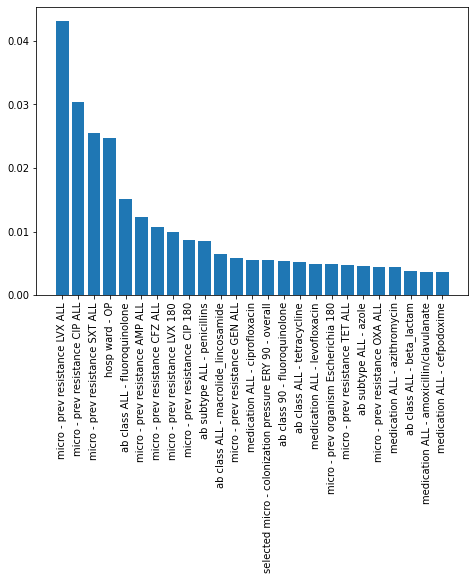

In [225]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation='vertical')
ax.bar(indexlistNG[:25],vallistNG[:25])
plt.show()

c:\Users\mt01034\Anaconda3\envs\tf-env\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


ValueError: x and y must have same first dimension, but have shapes (790,) and (2,)

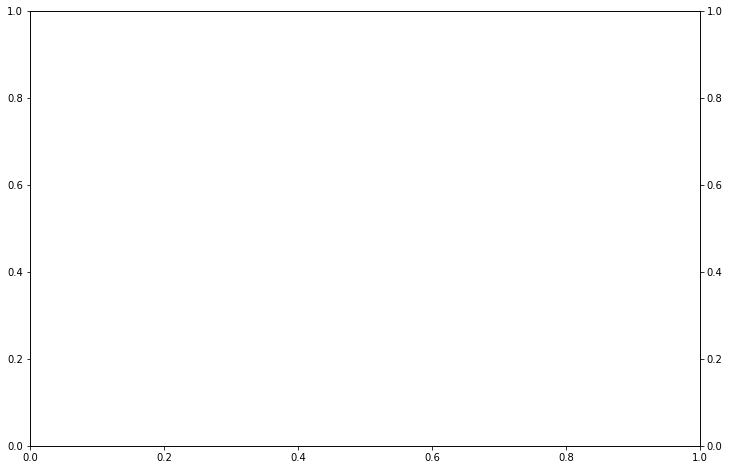

In [193]:
alphas = np.linspace(0, time_steps, time_steps)
fig, ax1 = plt.subplots(figsize=(12, 8))
ax2 = ax1.twinx()
ax2.plot(alphas, (listoftupleNG[1]), color="blue")
ax2.set_ylabel("gradients", color="blue", fontsize=14)
ax1.set_xlabel("alphas", fontsize=14)
#plt.title(f"Graph for {X.columns}", fontsize=14)

In [ ]:
test_data_reshaped = x_test_tfidf[1].reshape(1,time_steps,input_dimension)
#grads=get_gradients(test_data_reshaped, top_pred_idx=0)
igrads = get_integrated_gradients(test_data_reshaped, top_pred_idx=0, num_steps=50)
avg_grads = tf.reduce_mean(igrads, axis=0)
#sumigrad=[0]
#for igrad in igrads:
#    sumigrad=tf.add(sumigrad, igrad)



In [ ]:
alphas = np.linspace(0, time_steps, time_steps)
fig, ax1 = plt.subplots(figsize=(12, 8))
ax2 = ax1.twinx()
ax2.plot(alphas, (avg_grads), color="blue")
ax2.set_ylabel("gradients", color="blue", fontsize=14)
ax1.set_xlabel("alphas", fontsize=14)
#plt.title(f"Graph for {X.columns}", fontsize=14)

In [ ]:
alphas = np.linspace(0, 1, 50)
feat_n = 2  # age feature
fig, ax1 = plt.subplots(figsize=(12, 8))
ax2 = ax1.twinx()
ax2.plot(alphas, abs(igrads[:, feat_n]), color="blue")
ax2.set_ylabel("gradients", color="blue", fontsize=14)
ax2.set_ylim(-0.002, 0.1)
ax1.set_xlabel("alphas", fontsize=14)
plt.title(f"Graph for {X.columns[feat_n]}", fontsize=14)

In [ ]:
test_data_reshaped.shape

In [ ]:
test_data_reshaped[0].shape